<a href="https://colab.research.google.com/github/ahmadizza/AMS-MID-CS-GROUP-G/blob/main/(Colab_Utama)_AMS_Project_MID_CS_Group_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Capstone Project Analisis Media Sosial - Group G***

| NIM | Nama | Deskripsi |
| -------- | -------- | -------- |
|1122094000006  |AHMAD IZZA |Ambil Data, Preprocessing, Visualisasi |
|11220940000047  |RAJWAA WARDA YUNENDA PUTRI |Ambil Data,Visualisasi, PPT |
|11220940000063   |AWALIA DAMAYANTI  |Ambil Data, Visualisasi, PPT, Video |
|11220940000073  |NIKEN SAFIRA |Ambil Data, Visualisasi |






## Latar Belakang

Pada bulan Mei 2025, program barak militer bagi siswa bermasalah di Jawa Barat yang digagas oleh Dedi Mulyadi menjadi perbincangan hangat di ruang publik. Program ini bertujuan membina kedisiplinan dan karakter siswa yang dianggap memiliki perilaku menyimpang melalui pendekatan militeristik.

Meskipun dinilai sebagai langkah tegas untuk mengatasi kenakalan remaja, program ini menimbulkan pro dan kontra. Sebagian masyarakat mendukungnya sebagai solusi konkret terhadap masalah perilaku siswa, sementara yang lain mengkritiknya karena dianggap terlalu keras dan berpotensi melanggar hak anak.

Diskusi mengenai program ini ramai terjadi di media sosial, khususnya YouTube, yang menjadi wadah bagi masyarakat untuk mengekspresikan opini mereka. Analisis sentimen terhadap percakapan ini dapat memberikan gambaran mengenai persepsi publik, serta menjadi masukan penting bagi pembuat kebijakan dalam menangani siswa bermasalah secara lebih bijak dan manusiawi.

## Rumusan Masalah

**Permasalahan**

1. Apa isu-isu utama yang muncul terkait program barak militer bagi siswa bermasalah di Jawa Barat?

2. Bagaimana sentimen publik terhadap program barak militer bagi siswa bermasalah?

3. Bagaimana pola percakapan warganet tentang program ini di media sosial, khususnya YouTube?

4. Bagaimana respons warganet terhadap sosok Dedi Mulyadi sebagai penggagas program tersebut?


**Periode Pengumpulan Data**

2 Mei-27 Mei 2025

**Sumber Data**

YouTube

**Kata Kunci**
* Program barak militer
* Barak Militer Dedi Mulyadi
* Barak militer anak
* Barak militer siswa
* Siswa nakal Jawa barat


## Packages

In [ ]:
!pip install sastrawi
!pip install emoji # Install the emoji library
!pip install textblob
from textblob import TextBlob
import nltk
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import emoji

nltk.download('popular')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.9 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    | 

True

# **Mempersiapkan Data**

## Pengambilan Data YouTube

Setelah mengambil data di YouTube lalu kami lakukan proses penggabungan dan duplikat agar satu keyword mengambil video yang berbeda dari yang lain.


```
import pandas as pd
import glob

# Mencari semua file CSV di dalam folder 'tweets-data'
csv_files = glob.glob('tweets-data/*.csv') # list nama file yang disimpan
csv_files.sort()  # Use the sort() method of the list object

n = 0
for filename in csv_files: ## Menggabungkan file csv dalam bentuk dataframe
  # Read the CSV file into a pandas DataFrame
  if n == 0:
    df = pd.read_csv(filename, delimiter=",")
    n = 1
  else:
    df2 = pd.read_csv(filename, delimiter=",")
    df = pd.concat([df, df2])
    n+=1

# Membuang duplikat berdasarkan id_str
df.drop_duplicates(subset=['id_str'], keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

# Ekspor Data Hasil Scrapping
from google.colab import files
namafile = "DATAX_Naturalisasi_fix.csv"
df.to_csv(namafile, index=False)
files.download(namafile)
"Exported"
```



Kami menggunakan 5 keyword dan melakukan proses pengambilan komentar di video youtobe secara acak menggunakan API




```
# Pengambilan yang kami lakukan
import csv
from datetime import datetime
import googleapiclient.discovery

api_key = "your-api-key"

keywords = [
    "Program barak militer",
    "Barak Militer Dedi Mulyadi",
    "Barak militer anak",
    "Barak militer siswa",
    "Siswa nakal Jawa barat"
]

used_video_ids = set()  # Untuk menyimpan video yang sudah dipakai

def search_and_get_comments(search_query, max_videos=10, max_comments_per_video=250, start_date=None, end_date=None, csv_filename="youtube_comments.csv"):
    youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=api_key)

    search_response = youtube.search().list(
        part="snippet",
        q=search_query,
        type="video",
        maxResults=30  # ambil lebih banyak untuk jaga-jaga (nanti kita filter jadi 10 unik)
    ).execute()

    # Filter video yang belum dipakai
    video_titles_and_ids = {}
    for item in search_response['items']:
        if item['id']['kind'] == 'youtube#video':
            video_id = item['id']['videoId']
            if video_id not in used_video_ids:
                video_titles_and_ids[video_id] = item['snippet']['title']
                if len(video_titles_and_ids) >= max_videos:
                    break

    used_video_ids.update(video_titles_and_ids.keys())  # Tandai video ini sudah terpakai

    if not video_titles_and_ids:
        print(f"No new videos found for keyword '{search_query}'. Skipping.")
        return

    total_comments = 0
    unique_comments = set()

    start_dt = datetime.strptime(start_date, "%Y-%m-%d") if start_date else None
    end_dt = datetime.strptime(end_date, "%Y-%m-%d") if end_date else None

    with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["keyword", "video_id", "video_title", "comment_text", "published_at"])  # Header

        for video_id, video_title in video_titles_and_ids.items():
            try:
                next_page_token = None
                comments_written = 0

                while True:
                    request = youtube.commentThreads().list(
                        part="snippet",
                        videoId=video_id,
                        maxResults=100,
                        pageToken=next_page_token
                    )
                    response = request.execute()

                    for item in response['items']:
                        try:
                            snippet = item['snippet']['topLevelComment']['snippet']
                            comment_text = snippet['textDisplay']
                            published_at = snippet['publishedAt']
                            comment_dt = datetime.strptime(published_at, "%Y-%m-%dT%H:%M:%SZ")

                            if (start_dt and comment_dt < start_dt) or (end_dt and comment_dt > end_dt):
                                continue

                            unique_id = f"{video_id}_{comment_text}"
                            if unique_id in unique_comments:
                                continue
                            unique_comments.add(unique_id)

                            writer.writerow([search_query, video_id, video_title, comment_text, published_at])
                            total_comments += 1
                            comments_written += 1

                            if comments_written >= max_comments_per_video:
                                break
                        except KeyError:
                            continue

                    next_page_token = response.get("nextPageToken")
                    if not next_page_token or comments_written >= max_comments_per_video:
                        break

            except Exception as e:
                print(f"Error retrieving comments for video ID {video_id}: {e}")

    print(f"CSV file '{csv_filename}' created for keyword '{search_query}'.")
    print(f"Total unique comments retrieved: {total_comments}")
    print(f"Number of videos fetched: {len(video_titles_and_ids)}")

# Run for all keywords
start_date = "2025-05-02"
end_date = "2025-05-28"

for keyword in keywords:
    csv_file = f"youtube_comments_{keyword.replace(' ', '_')}.csv"
    search_and_get_comments(keyword, max_videos=10, max_comments_per_video=250, start_date=start_date, end_date=end_date, csv_filename=csv_file)

     
```




## Import Data

Berikut Link hasil pengambilan data dari youtobe:
- https://raw.githubusercontent.com/ahmadizza/AMS-MID-CS-GROUP-G/main/all_youtube_comments_combined.csv


In [ ]:
# Import data hasil pengambilan dari youtobe
import pandas as pd

# URL file raw CSV dari GitHub
url = 'https://raw.githubusercontent.com/ahmadizza/AMS-MID-CS-GROUP-G/main/all_youtube_comments_combined.csv'

# Membaca file langsung dari URL
dataRaw = pd.read_csv(url, low_memory=False, encoding='utf8')

# Menampilkan beberapa baris pertama
dataRaw.head()

keyword     video_id  \
0  Siswa nakal Jawa barat  3lQKfSWPHgA   
1  Siswa nakal Jawa barat  3lQKfSWPHgA   
2  Siswa nakal Jawa barat  3lQKfSWPHgA   
3  Siswa nakal Jawa barat  3lQKfSWPHgA   
4  Siswa nakal Jawa barat  3lQKfSWPHgA   

                                         video_title  \
0  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
1  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
2  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
3  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
4  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   

                                        comment_text          published_at  
0                                      Program bagus  2025-05-21T10:53:25Z  
1  gub jateng ga mikirin masa depan anak.mikiri w...  2025-05-21T00:28:40Z  
2  Bubarkan saja DPRD dan DPR ini, penuh dengan r...  2025-05-18T11:55:57Z  
3  TakutNya anak gak punya masalah, Tapi ibuNya y...  2025-05-17T23:56:01Z  
4  Siapa tau kan gedenya jadi tni, malah bagus in...  2025-05-17T16:44:17Z

In [ ]:
# melihat kolom di dataRaw
dataRaw.columns

Index(['keyword', 'video_id', 'video_title', 'comment_text', 'published_at'], dtype='object')

## Preprocessing

### Duplikasi Data

In [ ]:
# Menampilkan domment text yang duplikat
duplicate_count = dataRaw.duplicated(subset='comment_text').sum()
print(f"Jumlah komentar duplikat: {duplicate_count}")

Jumlah komentar duplikat: 86


In [ ]:
# Menampilkan contoh komentar duplikat dalam bentuk tabel
dataRaw[dataRaw.duplicated(subset='comment_text', keep=False)].head(86)

keyword     video_id  \
0     Siswa nakal Jawa barat  3lQKfSWPHgA   
84    Siswa nakal Jawa barat  3lQKfSWPHgA   
124   Siswa nakal Jawa barat  3lQKfSWPHgA   
153   Siswa nakal Jawa barat  3lQKfSWPHgA   
225   Siswa nakal Jawa barat  3lQKfSWPHgA   
...                      ...          ...   
4382      Barak militer anak  KmyfO5YZkdQ   
4429      Barak militer anak  UZ8USYlGZSs   
4472      Barak militer anak  UZ8USYlGZSs   
4479      Barak militer anak  UZ8USYlGZSs   
4532      Barak militer anak  UZ8USYlGZSs   

                                            video_title  \
0     Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
84    Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
124   Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
153   Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
225   Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
...                                                 ...   
4382  Dedi Mulyadi Siapkan Rp6 Miliar untuk Kirim An...   
4429                  Setop Kirim Anak ke Barak Militer   
4472                  Setop Kirim Anak ke Barak Militer   
4479                  Setop Kirim Anak ke Barak Militer   
4532                  Setop Kirim Anak ke Barak Militer   

                                           comment_text          published_at  
0                                         Program bagus  2025-05-21T10:53:25Z  
84    Jujur Saya warga JAWA TIMUR merasa iri ! Pak P...  2025-05-04T05:09:55Z  
124                                              Setuju  2025-05-03T04:16:40Z  
153   Kok seperti gaya negara sovyet waktu perang di...  2025-05-02T13:56:29Z  
225                                           Bravo KDM  2025-05-02T08:06:55Z  
...                                                 ...                   ...  
4382  Kami warga jakarta bisa nitip anak sekolah ngg...  2025-05-09T03:05:49Z  
4429  KPAI PUSAT TOLONG YG DI JABAR, ANAK2 ISTIMEWAN...  2025-05-26T14:21:07Z  
4472                                      Program bagus  2025-05-12T21:12:21Z  
4479  Trus apa gunanya ada guru BP ?<br><br>Gak usah...  2025-05-12T06:46:33Z  
4532  Kami warga jakarta bisa nitip anak sekolah ngg...  2025-05-09T03:07:06Z  

[86 rows x 5 columns]

In [ ]:
# Menghapus Duplikat
dataRaw.drop_duplicates(subset='comment_text', inplace=True)

In [ ]:
# Cek kembali yang Duplikat
duplicate_count = dataRaw.duplicated(subset='comment_text').sum()
print(f"Jumlah komentar duplikat: {duplicate_count}")

Jumlah komentar duplikat: 0


In [ ]:
# Menyimpan dalam bentuk CSV untuk data tanpa komen yanng duplikat
# dataRaw.to_csv('comments_no_duplicates.csv', index=False)

### Menambahkan labelling ke dalam Dataset

Dari data komentar tanpa duplikat, dilanjutkan dengan labelling dan disimpan di link github berikut :

https://raw.githubusercontent.com/ahmadizza/AMS-MID-CS-GROUP-G/refs/heads/main/youtube_comments_labeling_no%20duplicates_no%20comment%20judol.csv



Kami telah melakukan proses pelabelan sentimen (1:Positif, 2:Netral, dan 3:Negatif) pada setiap tweet sebelum data ini diunggah ke GitHub dan diimpor ke sini. Langkah ini dilakukan untuk mendukung analisis sentimen publik terkait topik Persepsi Publik di Media Sosial terhadap Program Barak Militer bagi Siswa Bermasalah di Jawa Barat.

In [ ]:
url2 = "https://raw.githubusercontent.com/ahmadizza/AMS-MID-CS-GROUP-G/refs/heads/main/youtube_comments_labeling_no%20duplicates_no%20comment%20judol.csv"
data = pd.read_csv(url2, low_memory=False, encoding='utf8')
data

keyword     video_id  \
0     Siswa nakal Jawa barat  3lQKfSWPHgA   
1     Siswa nakal Jawa barat  3lQKfSWPHgA   
2     Siswa nakal Jawa barat  3lQKfSWPHgA   
3     Siswa nakal Jawa barat  3lQKfSWPHgA   
4     Siswa nakal Jawa barat  3lQKfSWPHgA   
...                      ...          ...   
6365   Program barak militer  W412jxEtglo   
6366   Program barak militer  W412jxEtglo   
6367   Program barak militer  W412jxEtglo   
6368   Program barak militer  W412jxEtglo   
6369   Program barak militer  W412jxEtglo   

                                            video_title  \
0     Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
1     Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
2     Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
3     Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
4     Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
...                                                 ...   
6365  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6366  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6367  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6368  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6369  Pro kontra Program Pembinaan Siswa Nakal di Ba...   

                                           comment_text          published_at  \
0                                         Program bagus  2025-05-21T10:53:25Z   
1     gub jateng ga mikirin masa depan anak.mikiri w...  2025-05-21T00:28:40Z   
2     Bubarkan saja DPRD dan DPR ini, penuh dengan r...  2025-05-18T11:55:57Z   
3     TakutNya anak gak punya masalah, Tapi ibuNya y...  2025-05-17T23:56:01Z   
4     Siapa tau kan gedenya jadi tni, malah bagus in...  2025-05-17T16:44:17Z   
...                                                 ...                   ...   
6365  Ini manusia tidak berguna km bisanya mengalang...  2025-05-04T14:01:16Z   
6366  Jadi anak bandel biarin aja kata yg ga setuju ...  2025-05-04T14:00:50Z   
6367  Kalo anak anak ini di siksa boleh ibu nangis s...  2025-05-04T14:00:36Z   
6368  Dah lah hesti , ngapai nagisin ank org ,, sok ...  2025-05-04T13:54:09Z   
6369  Darah tinggi gue kumat dengerin ibu ini sue be...  2025-05-04T13:53:43Z   

      label  
0         1  
1         2  
2         2  
3         1  
4         1  
...     ...  
6365      1  
6366      2  
6367      1  
6368      2  
6369      2  

[6370 rows x 6 columns]

In [ ]:
# Drop kolom yang tidak diperlukan
data = data.drop(columns=['keyword', 'video_id'])
# Ubah urutan kolom: published_at di awal, sisanya diikuti
cols = ['published_at', 'video_title', 'comment_text', 'label']
data = data[cols]

data

published_at                                        video_title  \
0     2025-05-21T10:53:25Z  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
1     2025-05-21T00:28:40Z  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
2     2025-05-18T11:55:57Z  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
3     2025-05-17T23:56:01Z  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
4     2025-05-17T16:44:17Z  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
...                    ...                                                ...   
6365  2025-05-04T14:01:16Z  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6366  2025-05-04T14:00:50Z  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6367  2025-05-04T14:00:36Z  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6368  2025-05-04T13:54:09Z  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6369  2025-05-04T13:53:43Z  Pro kontra Program Pembinaan Siswa Nakal di Ba...   

                                           comment_text  label  
0                                         Program bagus      1  
1     gub jateng ga mikirin masa depan anak.mikiri w...      2  
2     Bubarkan saja DPRD dan DPR ini, penuh dengan r...      2  
3     TakutNya anak gak punya masalah, Tapi ibuNya y...      1  
4     Siapa tau kan gedenya jadi tni, malah bagus in...      1  
...                                                 ...    ...  
6365  Ini manusia tidak berguna km bisanya mengalang...      1  
6366  Jadi anak bandel biarin aja kata yg ga setuju ...      2  
6367  Kalo anak anak ini di siksa boleh ibu nangis s...      1  
6368  Dah lah hesti , ngapai nagisin ank org ,, sok ...      2  
6369  Darah tinggi gue kumat dengerin ibu ini sue be...      2  

[6370 rows x 4 columns]

### Ubah Tipe Data

In [ ]:
# Cek tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6370 entries, 0 to 6369
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   published_at  6370 non-null   object
 1   video_title   6370 non-null   object
 2   comment_text  6370 non-null   object
 3   label         6370 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 199.2+ KB


In [ ]:
# Ubah 'label' menjadi kategori
data['label'] = data['label'].astype('category')

# Ubah 'published_at' menjadi datetime (format ISO 8601 ke waktu biasa)
data['published_at'] = pd.to_datetime(data['published_at'], format='%Y-%m-%dT%H:%M:%SZ')

# Cek hasil
data.dtypes

published_at    datetime64[ns]
video_title             object
comment_text            object
label                 category
dtype: object

In [ ]:
# Cek jumlah tiap label
data['label'].value_counts()

label
2    3411
1    2833
3     126
Name: count, dtype: int64

### Missing Value

In [ ]:
# Cek Missing Value
data.isnull().sum()

published_at    0
video_title     0
comment_text    0
label           0
dtype: int64

Karena tidak ada missing value maka tidak perlu dihapus dan tidak perlu diubah apa apa datanya

# **Cleaning Text**

In [ ]:
# Membersihkan teks dari URL, mention, emoji, hashtag, angka, tanda baca, dan spasi berlebih
import re
import string
import unicodedata

def clean_text(text):
    text = text.lower()  # Ubah ke lowercase

    # Hilangkan karakter aneh (emoji, simbol asing)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Hapus URL, mention, hashtag
    text = re.sub(r'http\S+|www.\S+', '', text)       # URL
    text = re.sub(r'@\w+', '', text)                  # mention
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r'#\w+', '', text)                  # hashtag

    # Hapus angka
    text = re.sub(r'\d+', '', text)

    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Membersihkan semua teks dalam kolom comment_text
data['cleaned_text'] = data['comment_text'].apply(clean_text)
data

published_at                                        video_title  \
0    2025-05-21 10:53:25  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
1    2025-05-21 00:28:40  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
2    2025-05-18 11:55:57  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
3    2025-05-17 23:56:01  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
4    2025-05-17 16:44:17  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
...                  ...                                                ...   
6365 2025-05-04 14:01:16  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6366 2025-05-04 14:00:50  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6367 2025-05-04 14:00:36  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6368 2025-05-04 13:54:09  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6369 2025-05-04 13:53:43  Pro kontra Program Pembinaan Siswa Nakal di Ba...   

                                           comment_text label  \
0                                         Program bagus     1   
1     gub jateng ga mikirin masa depan anak.mikiri w...     2   
2     Bubarkan saja DPRD dan DPR ini, penuh dengan r...     2   
3     TakutNya anak gak punya masalah, Tapi ibuNya y...     1   
4     Siapa tau kan gedenya jadi tni, malah bagus in...     1   
...                                                 ...   ...   
6365  Ini manusia tidak berguna km bisanya mengalang...     1   
6366  Jadi anak bandel biarin aja kata yg ga setuju ...     2   
6367  Kalo anak anak ini di siksa boleh ibu nangis s...     1   
6368  Dah lah hesti , ngapai nagisin ank org ,, sok ...     2   
6369  Darah tinggi gue kumat dengerin ibu ini sue be...     2   

                                           cleaned_text  
0                                         program bagus  
1     gub jateng ga mikirin masa depan anakmikiri wu...  
2     bubarkan saja dprd dan dpr ini penuh dengan re...  
3     takutnya anak gak punya masalah tapi ibunya yg...  
4     siapa tau kan gedenya jadi tni malah bagus ini...  
...                                                 ...  
6365  ini manusia tidak berguna km bisanya mengalang...  
6366  jadi anak bandel biarin aja kata yg ga setuju ...  
6367  kalo anak anak ini di siksa boleh ibu nangis s...  
6368  dah lah hesti ngapai nagisin ank org sok iye p...  
6369  darah tinggi gue kumat dengerin ibu ini sue be...  

[6370 rows x 5 columns]

## Normalisasi Data

In [ ]:
# Buat folder data
!mkdir -p data
!wget -P data/ https://raw.githubusercontent.com/ahmadizza/AMS-MID-CS-GROUP-G/refs/heads/main/slangs%20%26%20typos.txt

# Lokasi file
slang_file = 'data/slangs & typos.txt'

# Membuat kamus slang dari file
slang_dict = {}
with open(slang_file, 'r', encoding='utf-8') as file:
    for line in file:
        if ':' in line:
            slang, standard = line.strip().split(':', 1)
            slang_dict[slang.strip()] = standard.strip()

# Pastikan sudah import word_tokenize (dari NLTK)
from nltk.tokenize import word_tokenize

# Fungsi untuk mengganti slang dengan kata baku
def normalize_slang(text):
    words = word_tokenize(text.lower())
    return ' '.join([slang_dict.get(word, word) for word in words])

# Terapkan ke kolom 'cleaned_text'
data['normalized_comment'] = data['cleaned_text'].apply(normalize_slang)

# Lihat hasil
data[['cleaned_text', 'normalized_comment']].head()

--2025-06-05 14:23:38--  https://raw.githubusercontent.com/ahmadizza/AMS-MID-CS-GROUP-G/refs/heads/main/slangs%20%26%20typos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61847 (60K) [text/plain]
Saving to: ‘data/slangs & typos.txt’

slangs & typos.txt  100%[===================>]  60.40K  --.-KB/s    in 0.02s   

2025-06-05 14:23:39 (2.86 MB/s) - ‘data/slangs & typos.txt’ saved [61847/61847]



cleaned_text  \
0                                      program bagus   
1  gub jateng ga mikirin masa depan anakmikiri wu...   
2  bubarkan saja dprd dan dpr ini penuh dengan re...   
3  takutnya anak gak punya masalah tapi ibunya yg...   
4  siapa tau kan gedenya jadi tni malah bagus ini...   

                                  normalized_comment  
0                                      program bagus  
1  gubernur jawa tengah tidak mikirin masa depan ...  
2  bubarkan saja dewan perwakilan rakyat daerah d...  
3  takutnya anak tidak punya masalah tapi ibunya ...  
4  siapa tahu akan gedenya jadi tentara nasional ...

In [ ]:
# Cek isi data
data

published_at                                        video_title  \
0    2025-05-21 10:53:25  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
1    2025-05-21 00:28:40  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
2    2025-05-18 11:55:57  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
3    2025-05-17 23:56:01  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
4    2025-05-17 16:44:17  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
...                  ...                                                ...   
6365 2025-05-04 14:01:16  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6366 2025-05-04 14:00:50  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6367 2025-05-04 14:00:36  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6368 2025-05-04 13:54:09  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6369 2025-05-04 13:53:43  Pro kontra Program Pembinaan Siswa Nakal di Ba...   

                                           comment_text label  \
0                                         Program bagus     1   
1     gub jateng ga mikirin masa depan anak.mikiri w...     2   
2     Bubarkan saja DPRD dan DPR ini, penuh dengan r...     2   
3     TakutNya anak gak punya masalah, Tapi ibuNya y...     1   
4     Siapa tau kan gedenya jadi tni, malah bagus in...     1   
...                                                 ...   ...   
6365  Ini manusia tidak berguna km bisanya mengalang...     1   
6366  Jadi anak bandel biarin aja kata yg ga setuju ...     2   
6367  Kalo anak anak ini di siksa boleh ibu nangis s...     1   
6368  Dah lah hesti , ngapai nagisin ank org ,, sok ...     2   
6369  Darah tinggi gue kumat dengerin ibu ini sue be...     2   

                                           cleaned_text  \
0                                         program bagus   
1     gub jateng ga mikirin masa depan anakmikiri wu...   
2     bubarkan saja dprd dan dpr ini penuh dengan re...   
3     takutnya anak gak punya masalah tapi ibunya yg...   
4     siapa tau kan gedenya jadi tni malah bagus ini...   
...                                                 ...   
6365  ini manusia tidak berguna km bisanya mengalang...   
6366  jadi anak bandel biarin aja kata yg ga setuju ...   
6367  kalo anak anak ini di siksa boleh ibu nangis s...   
6368  dah lah hesti ngapai nagisin ank org sok iye p...   
6369  darah tinggi gue kumat dengerin ibu ini sue be...   

                                     normalized_comment  
0                                         program bagus  
1     gubernur jawa tengah tidak mikirin masa depan ...  
2     bubarkan saja dewan perwakilan rakyat daerah d...  
3     takutnya anak tidak punya masalah tapi ibunya ...  
4     siapa tahu akan gedenya jadi tentara nasional ...  
...                                                 ...  
6365  ini manusia tidak berguna kamu bisanya mengala...  
6366  jadi anak nakal biarin saja kata yang tidak se...  
6367  kalau anak anak ini di siksa boleh ibu menangi...  
6368  sudah lah hesti ngapai nagisin anak orang sila...  
6369  darah tinggi saya kumat dengarkan ibu ini sue ...  

[6370 rows x 6 columns]

## Cleaning Data Lanjutan

In [ ]:
# Membersihkan semua teks dalam kolom normalized_comment
data['cleaned_text2'] = data['normalized_comment'].apply(clean_text)
data

published_at                                        video_title  \
0    2025-05-21 10:53:25  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
1    2025-05-21 00:28:40  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
2    2025-05-18 11:55:57  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
3    2025-05-17 23:56:01  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
4    2025-05-17 16:44:17  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
...                  ...                                                ...   
6365 2025-05-04 14:01:16  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6366 2025-05-04 14:00:50  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6367 2025-05-04 14:00:36  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6368 2025-05-04 13:54:09  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6369 2025-05-04 13:53:43  Pro kontra Program Pembinaan Siswa Nakal di Ba...   

                                           comment_text label  \
0                                         Program bagus     1   
1     gub jateng ga mikirin masa depan anak.mikiri w...     2   
2     Bubarkan saja DPRD dan DPR ini, penuh dengan r...     2   
3     TakutNya anak gak punya masalah, Tapi ibuNya y...     1   
4     Siapa tau kan gedenya jadi tni, malah bagus in...     1   
...                                                 ...   ...   
6365  Ini manusia tidak berguna km bisanya mengalang...     1   
6366  Jadi anak bandel biarin aja kata yg ga setuju ...     2   
6367  Kalo anak anak ini di siksa boleh ibu nangis s...     1   
6368  Dah lah hesti , ngapai nagisin ank org ,, sok ...     2   
6369  Darah tinggi gue kumat dengerin ibu ini sue be...     2   

                                           cleaned_text  \
0                                         program bagus   
1     gub jateng ga mikirin masa depan anakmikiri wu...   
2     bubarkan saja dprd dan dpr ini penuh dengan re...   
3     takutnya anak gak punya masalah tapi ibunya yg...   
4     siapa tau kan gedenya jadi tni malah bagus ini...   
...                                                 ...   
6365  ini manusia tidak berguna km bisanya mengalang...   
6366  jadi anak bandel biarin aja kata yg ga setuju ...   
6367  kalo anak anak ini di siksa boleh ibu nangis s...   
6368  dah lah hesti ngapai nagisin ank org sok iye p...   
6369  darah tinggi gue kumat dengerin ibu ini sue be...   

                                     normalized_comment  \
0                                         program bagus   
1     gubernur jawa tengah tidak mikirin masa depan ...   
2     bubarkan saja dewan perwakilan rakyat daerah d...   
3     takutnya anak tidak punya masalah tapi ibunya ...   
4     siapa tahu akan gedenya jadi tentara nasional ...   
...                                                 ...   
6365  ini manusia tidak berguna kamu bisanya mengala...   
6366  jadi anak nakal biarin saja kata yang tidak se...   
6367  kalau anak anak ini di siksa boleh ibu menangi...   
6368  sudah lah hesti ngapai nagisin anak orang sila...   
6369  darah tinggi saya kumat dengarkan ibu ini sue ...   

                                          cleaned_text2  
0                                         program bagus  
1     gubernur jawa tengah tidak mikirin masa depan ...  
2     bubarkan saja dewan perwakilan rakyat daerah d...  
3     takutnya anak tidak punya masalah tapi ibunya ...  
4     siapa tahu akan gedenya jadi tentara nasional ...  
...                                                 ...  
6365  ini manusia tidak berguna kamu bisanya mengala...  
6366  jadi anak nakal biarin saja kata yang tidak se...  
6367  kalau anak anak ini di siksa boleh ibu menangi...  
6368  sudah lah hesti ngapai nagisin anak orang sila...  
6369  darah tinggi saya kumat dengarkan ibu ini sue ...  

[6370 rows x 7 columns]

### Stopword

Sebelumnya kita sudah gabungkan semua stopword menjadi satu file dalam link berikut :

https://raw.githubusercontent.com/ahmadizza/AMS-MID-CS-GROUP-G/refs/heads/main/stopwords.txt

In [ ]:
!wget -O data/stopwords_id.txt https://raw.githubusercontent.com/ahmadizza/AMS-MID-CS-GROUP-G/refs/heads/main/stopwords.txt
# Menghapus stopwords bahasa Indonesia
# Baca file stopwords
with open('data/stopwords_id.txt', "r", encoding="utf-8", errors='replace') as file:
    id_stop = file.readlines()

# Bersihkan stopwords (strip newline/spasi & lowercase)
id_stop = [word.strip().lower() for word in id_stop]

# Tambahkan kata-kata tambahan
additional_stopwords = {
    'nya', 'iya', 'itu', 'kah', 'dan', 'ke', 'di',
    'turun', 'naik', 'ambil', 'lihat',
    'tolong', 'atas', 'pokok', 'hari',
    'naikin', 'presiden', 'indonesia', 'sih', 'pakai',
    'biar', 'juta', 'ribu',
}

# Gabungkan ke list utama
id_stop = set(id_stop).union(additional_stopwords)

# Fungsi hapus stopwords
def remove_custom_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in id_stop])

# Terapkan ke kolom yang sudah dibersihkan sebelumnya
data['no_stopwords'] = data['cleaned_text2'].apply(remove_custom_stopwords)

# Lihat hasil
data

--2025-06-05 14:23:43--  https://raw.githubusercontent.com/ahmadizza/AMS-MID-CS-GROUP-G/refs/heads/main/stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9027 (8.8K) [text/plain]
Saving to: ‘data/stopwords_id.txt’

data/stopwords_id.t 100%[===================>]   8.82K  --.-KB/s    in 0s      

2025-06-05 14:23:43 (60.2 MB/s) - ‘data/stopwords_id.txt’ saved [9027/9027]



published_at                                        video_title  \
0    2025-05-21 10:53:25  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
1    2025-05-21 00:28:40  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
2    2025-05-18 11:55:57  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
3    2025-05-17 23:56:01  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
4    2025-05-17 16:44:17  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
...                  ...                                                ...   
6365 2025-05-04 14:01:16  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6366 2025-05-04 14:00:50  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6367 2025-05-04 14:00:36  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6368 2025-05-04 13:54:09  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6369 2025-05-04 13:53:43  Pro kontra Program Pembinaan Siswa Nakal di Ba...   

                                           comment_text label  \
0                                         Program bagus     1   
1     gub jateng ga mikirin masa depan anak.mikiri w...     2   
2     Bubarkan saja DPRD dan DPR ini, penuh dengan r...     2   
3     TakutNya anak gak punya masalah, Tapi ibuNya y...     1   
4     Siapa tau kan gedenya jadi tni, malah bagus in...     1   
...                                                 ...   ...   
6365  Ini manusia tidak berguna km bisanya mengalang...     1   
6366  Jadi anak bandel biarin aja kata yg ga setuju ...     2   
6367  Kalo anak anak ini di siksa boleh ibu nangis s...     1   
6368  Dah lah hesti , ngapai nagisin ank org ,, sok ...     2   
6369  Darah tinggi gue kumat dengerin ibu ini sue be...     2   

                                           cleaned_text  \
0                                         program bagus   
1     gub jateng ga mikirin masa depan anakmikiri wu...   
2     bubarkan saja dprd dan dpr ini penuh dengan re...   
3     takutnya anak gak punya masalah tapi ibunya yg...   
4     siapa tau kan gedenya jadi tni malah bagus ini...   
...                                                 ...   
6365  ini manusia tidak berguna km bisanya mengalang...   
6366  jadi anak bandel biarin aja kata yg ga setuju ...   
6367  kalo anak anak ini di siksa boleh ibu nangis s...   
6368  dah lah hesti ngapai nagisin ank org sok iye p...   
6369  darah tinggi gue kumat dengerin ibu ini sue be...   

                                     normalized_comment  \
0                                         program bagus   
1     gubernur jawa tengah tidak mikirin masa depan ...   
2     bubarkan saja dewan perwakilan rakyat daerah d...   
3     takutnya anak tidak punya masalah tapi ibunya ...   
4     siapa tahu akan gedenya jadi tentara nasional ...   
...                                                 ...   
6365  ini manusia tidak berguna kamu bisanya mengala...   
6366  jadi anak nakal biarin saja kata yang tidak se...   
6367  kalau anak anak ini di siksa boleh ibu menangi...   
6368  sudah lah hesti ngapai nagisin anak orang sila...   
6369  darah tinggi saya kumat dengarkan ibu ini sue ...   

                                          cleaned_text2  \
0                                         program bagus   
1     gubernur jawa tengah tidak mikirin masa depan ...   
2     bubarkan saja dewan perwakilan rakyat daerah d...   
3     takutnya anak tidak punya masalah tapi ibunya ...   
4     siapa tahu akan gedenya jadi tentara nasional ...   
...                                                 ...   
6365  ini manusia tidak berguna kamu bisanya mengala...   
6366  jadi anak nakal biarin saja kata yang tidak se...   
6367  kalau anak anak ini di siksa boleh ibu menangi...   
6368  sudah lah hesti ngapai nagisin anak orang sila...   
6369  darah tinggi saya kumat dengarkan ibu ini sue ...   

                                           no_stopwords  
0                                                 bagus  
1                               mikirin

###Data Lemmatization

In [ ]:
# Proses mengubah kata ke bentuk dasarnya (root word).
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming menggunakan Sastrawi
def stem_text(text):
    return stemmer.stem(text)

# Terapkan stemming pada kolom 'no_stopwords'
data['stemmed_text'] = data['no_stopwords'].apply(stem_text)

data

published_at                                        video_title  \
0    2025-05-21 10:53:25  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
1    2025-05-21 00:28:40  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
2    2025-05-18 11:55:57  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
3    2025-05-17 23:56:01  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
4    2025-05-17 16:44:17  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
...                  ...                                                ...   
6365 2025-05-04 14:01:16  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6366 2025-05-04 14:00:50  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6367 2025-05-04 14:00:36  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6368 2025-05-04 13:54:09  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6369 2025-05-04 13:53:43  Pro kontra Program Pembinaan Siswa Nakal di Ba...   

                                           comment_text label  \
0                                         Program bagus     1   
1     gub jateng ga mikirin masa depan anak.mikiri w...     2   
2     Bubarkan saja DPRD dan DPR ini, penuh dengan r...     2   
3     TakutNya anak gak punya masalah, Tapi ibuNya y...     1   
4     Siapa tau kan gedenya jadi tni, malah bagus in...     1   
...                                                 ...   ...   
6365  Ini manusia tidak berguna km bisanya mengalang...     1   
6366  Jadi anak bandel biarin aja kata yg ga setuju ...     2   
6367  Kalo anak anak ini di siksa boleh ibu nangis s...     1   
6368  Dah lah hesti , ngapai nagisin ank org ,, sok ...     2   
6369  Darah tinggi gue kumat dengerin ibu ini sue be...     2   

                                           cleaned_text  \
0                                         program bagus   
1     gub jateng ga mikirin masa depan anakmikiri wu...   
2     bubarkan saja dprd dan dpr ini penuh dengan re...   
3     takutnya anak gak punya masalah tapi ibunya yg...   
4     siapa tau kan gedenya jadi tni malah bagus ini...   
...                                                 ...   
6365  ini manusia tidak berguna km bisanya mengalang...   
6366  jadi anak bandel biarin aja kata yg ga setuju ...   
6367  kalo anak anak ini di siksa boleh ibu nangis s...   
6368  dah lah hesti ngapai nagisin ank org sok iye p...   
6369  darah tinggi gue kumat dengerin ibu ini sue be...   

                                     normalized_comment  \
0                                         program bagus   
1     gubernur jawa tengah tidak mikirin masa depan ...   
2     bubarkan saja dewan perwakilan rakyat daerah d...   
3     takutnya anak tidak punya masalah tapi ibunya ...   
4     siapa tahu akan gedenya jadi tentara nasional ...   
...                                                 ...   
6365  ini manusia tidak berguna kamu bisanya mengala...   
6366  jadi anak nakal biarin saja kata yang tidak se...   
6367  kalau anak anak ini di siksa boleh ibu menangi...   
6368  sudah lah hesti ngapai nagisin anak orang sila...   
6369  darah tinggi saya kumat dengarkan ibu ini sue ...   

                                          cleaned_text2  \
0                                         program bagus   
1     gubernur jawa tengah tidak mikirin masa depan ...   
2     bubarkan saja dewan perwakilan rakyat daerah d...   
3     takutnya anak tidak punya masalah tapi ibunya ...   
4     siapa tahu akan gedenya jadi tentara nasional ...   
...                                                 ...   
6365  ini manusia tidak berguna kamu bisanya mengala...   
6366  jadi anak nakal biarin saja kata yang tidak se...   
6367  kalau anak anak ini di siksa boleh ibu menangi...   
6368  sudah lah hesti ngapai nagisin anak orang sila...   
6369  darah tinggi saya kumat dengarkan ibu ini sue ...   

                                           no_stopwords  \
0                                                 bagus   
1                               mikir

### Stopword lanjutan

In [ ]:
# --- Kode untuk Top 100 Kata dari df_stemmed ---

from collections import Counter

all_words = []

# Iterasi melalui setiap entri di kolom 'stemmed_text'
# Menggunakan .dropna() untuk menghindari error jika ada nilai NaN
# Menggunakan .astype(str) untuk mengubah semua nilai menjadi string (mengantisipasi jika ada tipe data lain)
for text_entry in data['stemmed_text'].dropna().astype(str):
    if text_entry.strip():  # Memastikan string tidak kosong setelah di-strip
        # Jika isi 'stemmed_text' adalah string kata-kata yang dipisahkan spasi
        words = text_entry.split()
        all_words.extend(words)
        # Jika isi 'stemmed_text' sudah berupa list of words, Anda bisa langsung:
        # all_words.extend(text_entry) # Namun, ini memerlukan text_entry sudah pasti list

# Hitung frekuensi setiap kata
word_counts = Counter(all_words)

# Dapatkan 100 kata paling umum
top_100_words = word_counts.most_common(100)

print("--- Top 100 kata yang sering muncul dari 'stemmed_text' ---")
if top_100_words:
    for word, count in top_100_words:
        print(f"{word}: {count}")
else:
    print("Tidak ada kata untuk dihitung (mungkin semua entri kosong atau NaN).")
print("-" * 40)

--- Top 100 kata yang sering muncul dari 'stemmed_text' ---
komisi: 622
lindung: 610
rakyat: 528
didik: 491
tuju: 463
bicara: 376
moga: 368
jabat: 358
nasional: 331
tentara: 322
masuk: 271
dukung: 246
dewan: 244
bagus: 240
sehat: 230
wakil: 227
mantap: 227
sekolah: 223
disiplin: 222
solusi: 204
umpat: 200
maju: 193
manusia: 187
hasil: 179
suka: 175
pimpin: 172
hak: 169
bijak: 167
masyarakat: 166
jalan: 164
keren: 162
baik: 160
omon: 159
warga: 154
uang: 151
kerja: 150
bina: 149
generasi: 149
teori: 148
timur: 145
antem: 139
kasih: 138
menang: 137
anak: 134
si: 134
guna: 131
kritik: 130
pikir: 127
makan: 126
nyata: 125
asasi: 125
ajar: 124
daerah: 123
hebat: 122
bubar: 121
nyinyir: 121
coba: 120
amin: 118
urus: 116
ono: 113
kirim: 108
bikin: 108
semangat: 105
karakter: 103
latih: 101
bangga: 101
salah: 101
tindak: 99
ubah: 99
muda: 99
hati: 97
televisi: 95
komentar: 94
perintah: 93
dengar: 92
wajib: 92
sila: 92
mental: 91
bilang: 91
takut: 89
mudah: 89
bawa: 88
umur: 88
cari: 88
langsun

In [ ]:
# Tambahkan stopwords tambahan
additional_stopwords = {
    'adik', 'agama', 'ajar', 'ala', 'amp', 'anak', 'anggota', 'anggar', 'antem', 'apa', 'arti', 'asasi', 'bantu',
    'bawa', 'beda', 'bicara', 'bikin', 'bilang', 'bina', 'bukti', 'cari', 'coba', 'contoh', 'daerah', 'dewan',
    'diam', 'didik', 'disiplin', 'dukung', 'gaji buta', 'generasi', 'generasi muda', 'gubenur', 'hak', 'hasil',
    'henti', 'hormat', 'ide', 'ikut', 'jakarta', 'jalan', 'jaman', 'jabatan', 'jabat', 'kak seto', 'kali',
    'karakter', 'keluarga', 'kerja', 'kaya', 'kirim', 'khofifah', 'komentar', 'komisi', 'koruptor', 'lindung',
    'lihat', 'lembaga', 'lulus', 'langsung', 'malu', 'makan', 'makan gaji', 'manusia', 'masuk', 'masyarakat',
    'media', 'metropolitan', 'metropolitan televisi', 'mental', 'moga', 'mu', 'muda', 'murid', 'nama', 'nasional',
    'neng', 'negara', 'nilai', 'nol', 'nyata', 'omong', 'omon', 'omon omon', 'ono', 'otak', 'pas', 'penuh',
    'pikir', 'pilih', 'pimpin', 'pintar', 'republik', 'remaja', 'rg', 'rakyat', 'rumah', 'sila', 'sehat', 'sekolah',
    'sesuaI', 'si', 'smp', 'solusi', 'swt', 'tanggung', 'televisi', 'teman', 'tentara', 'teori', 'tinggal', 'timur',
    'tuju', 'tujuan', 'tuju', 'ubah', 'uang', 'umpat', 'umpat umpat', 'urus', 'wakil', 'wajib', 'warga', 'wudele',
    'nama', 'rocky'
}

# Gabungkan dengan stopwords yang sudah ada
id_stop = set(id_stop).union(additional_stopwords)

# Fungsi hapus stopwords dari list kata
def remove_custom_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in id_stop])

# Terapkan ke kolom hasil lemmatization (yang sudah berupa list kata)
data['no_stopwords2'] = data['stemmed_text'].apply(remove_custom_stopwords)

data

published_at                                        video_title  \
0    2025-05-21 10:53:25  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
1    2025-05-21 00:28:40  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
2    2025-05-18 11:55:57  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
3    2025-05-17 23:56:01  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
4    2025-05-17 16:44:17  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
...                  ...                                                ...   
6365 2025-05-04 14:01:16  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6366 2025-05-04 14:00:50  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6367 2025-05-04 14:00:36  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6368 2025-05-04 13:54:09  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6369 2025-05-04 13:53:43  Pro kontra Program Pembinaan Siswa Nakal di Ba...   

                                           comment_text label  \
0                                         Program bagus     1   
1     gub jateng ga mikirin masa depan anak.mikiri w...     2   
2     Bubarkan saja DPRD dan DPR ini, penuh dengan r...     2   
3     TakutNya anak gak punya masalah, Tapi ibuNya y...     1   
4     Siapa tau kan gedenya jadi tni, malah bagus in...     1   
...                                                 ...   ...   
6365  Ini manusia tidak berguna km bisanya mengalang...     1   
6366  Jadi anak bandel biarin aja kata yg ga setuju ...     2   
6367  Kalo anak anak ini di siksa boleh ibu nangis s...     1   
6368  Dah lah hesti , ngapai nagisin ank org ,, sok ...     2   
6369  Darah tinggi gue kumat dengerin ibu ini sue be...     2   

                                           cleaned_text  \
0                                         program bagus   
1     gub jateng ga mikirin masa depan anakmikiri wu...   
2     bubarkan saja dprd dan dpr ini penuh dengan re...   
3     takutnya anak gak punya masalah tapi ibunya yg...   
4     siapa tau kan gedenya jadi tni malah bagus ini...   
...                                                 ...   
6365  ini manusia tidak berguna km bisanya mengalang...   
6366  jadi anak bandel biarin aja kata yg ga setuju ...   
6367  kalo anak anak ini di siksa boleh ibu nangis s...   
6368  dah lah hesti ngapai nagisin ank org sok iye p...   
6369  darah tinggi gue kumat dengerin ibu ini sue be...   

                                     normalized_comment  \
0                                         program bagus   
1     gubernur jawa tengah tidak mikirin masa depan ...   
2     bubarkan saja dewan perwakilan rakyat daerah d...   
3     takutnya anak tidak punya masalah tapi ibunya ...   
4     siapa tahu akan gedenya jadi tentara nasional ...   
...                                                 ...   
6365  ini manusia tidak berguna kamu bisanya mengala...   
6366  jadi anak nakal biarin saja kata yang tidak se...   
6367  kalau anak anak ini di siksa boleh ibu menangi...   
6368  sudah lah hesti ngapai nagisin anak orang sila...   
6369  darah tinggi saya kumat dengarkan ibu ini sue ...   

                                          cleaned_text2  \
0                                         program bagus   
1     gubernur jawa tengah tidak mikirin masa depan ...   
2     bubarkan saja dewan perwakilan rakyat daerah d...   
3     takutnya anak tidak punya masalah tapi ibunya ...   
4     siapa tahu akan gedenya jadi tentara nasional ...   
...                                                 ...   
6365  ini manusia tidak berguna kamu bisanya mengala...   
6366  jadi anak nakal biarin saja kata yang tidak se...   
6367  kalau anak anak ini di siksa boleh ibu menangi...   
6368  sudah lah hesti ngapai nagisin anak orang sila...   
6369  darah tinggi saya kumat dengarkan ibu ini sue ...   

                                           no_stopwords  \
0                                                 bagus   
1                               mikir

In [ ]:
# --- Kode untuk Top 100 Kata dari df_stemmed ---

from collections import Counter

all_words = []

# Iterasi melalui setiap entri di kolom 'stemmed_text'
# Menggunakan .dropna() untuk menghindari error jika ada nilai NaN
# Menggunakan .astype(str) untuk mengubah semua nilai menjadi string (mengantisipasi jika ada tipe data lain)
for text_entry in data['no_stopwords2'].dropna().astype(str):
    if text_entry.strip():  # Memastikan string tidak kosong setelah di-strip
        # Jika isi 'stemmed_text' adalah string kata-kata yang dipisahkan spasi
        words = text_entry.split()
        all_words.extend(words)
        # Jika isi 'stemmed_text' sudah berupa list of words, Anda bisa langsung:
        # all_words.extend(text_entry) # Namun, ini memerlukan text_entry sudah pasti list

# Hitung frekuensi setiap kata
word_counts = Counter(all_words)

# Dapatkan 100 kata paling umum
top_100_words = word_counts.most_common(100)

print("--- Top 100 kata yang sering muncul dari 'stemmed_text' ---")
if top_100_words:
    for word, count in top_100_words:
        print(f"{word}: {count}")
else:
    print("Tidak ada kata untuk dihitung (mungkin semua entri kosong atau NaN).")
print("-" * 40)

--- Top 100 kata yang sering muncul dari 'stemmed_text' ---
bagus: 240
mantap: 227
maju: 193
suka: 175
bijak: 167
keren: 162
kasih: 138
menang: 137
kritik: 130
hebat: 122
bubar: 121
nyinyir: 121
amin: 118
semangat: 105
latih: 101
bangga: 101
salah: 101
tindak: 99
hati: 97
perintah: 93
dengar: 92
takut: 89
mudah: 89
umur: 88
hidup: 84
laku: 82
tangan: 81
kaji: 80
sukses: 80
cinta: 80
alhamdulillah: 80
gaji: 79
bodoh: 79
positif: 74
manfaat: 74
terima: 73
gerung: 73
guru: 71
atur: 70
butuh: 68
peduli: 63
bentuk: 59
negeri: 59
susah: 59
keras: 58
berita: 58
mata: 57
teriak: 57
lapang: 55
habis: 55
cerdas: 55
bangun: 54
paham: 53
main: 53
harap: 50
emas: 50
rusak: 50
suruh: 50
terap: 47
protes: 47
senang: 47
provinsi: 46
politik: 46
polisi: 46
pulang: 46
dangkal: 46
korupsi: 45
lingkung: 45
buta: 44
motor: 44
sayang: 44
air: 43
kuat: 43
iri: 43
ayo: 43
duduk: 43
jiwa: 43
dasar: 42
pesantren: 42
perhati: 42
komen: 41
cocok: 41
sampah: 41
juang: 40
tidur: 40
beliau: 40
kak: 40
mulut: 39
suar

### Tokenisasi

In [ ]:
# Proses memecah teks menjadi bagian-bagian kecil yang disebut token. Token biasanya berupa kata, frasa, atau simbol.
# Fungsi untuk tokenisasi teks
def tokenize_text(text):
    return word_tokenize(text)  # Tokenisasi teks menjadi list kata

# Terapkan tokenisasi ke kolom 'stemmed_text'
data['tokenize_text'] = data['no_stopwords2'].apply(tokenize_text)

data

published_at                                        video_title  \
0    2025-05-21 10:53:25  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
1    2025-05-21 00:28:40  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
2    2025-05-18 11:55:57  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
3    2025-05-17 23:56:01  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
4    2025-05-17 16:44:17  Top Review - Solusi Anak Nakal, Masuk Barak Mi...   
...                  ...                                                ...   
6365 2025-05-04 14:01:16  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6366 2025-05-04 14:00:50  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6367 2025-05-04 14:00:36  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6368 2025-05-04 13:54:09  Pro kontra Program Pembinaan Siswa Nakal di Ba...   
6369 2025-05-04 13:53:43  Pro kontra Program Pembinaan Siswa Nakal di Ba...   

                                           comment_text label  \
0                                         Program bagus     1   
1     gub jateng ga mikirin masa depan anak.mikiri w...     2   
2     Bubarkan saja DPRD dan DPR ini, penuh dengan r...     2   
3     TakutNya anak gak punya masalah, Tapi ibuNya y...     1   
4     Siapa tau kan gedenya jadi tni, malah bagus in...     1   
...                                                 ...   ...   
6365  Ini manusia tidak berguna km bisanya mengalang...     1   
6366  Jadi anak bandel biarin aja kata yg ga setuju ...     2   
6367  Kalo anak anak ini di siksa boleh ibu nangis s...     1   
6368  Dah lah hesti , ngapai nagisin ank org ,, sok ...     2   
6369  Darah tinggi gue kumat dengerin ibu ini sue be...     2   

                                           cleaned_text  \
0                                         program bagus   
1     gub jateng ga mikirin masa depan anakmikiri wu...   
2     bubarkan saja dprd dan dpr ini penuh dengan re...   
3     takutnya anak gak punya masalah tapi ibunya yg...   
4     siapa tau kan gedenya jadi tni malah bagus ini...   
...                                                 ...   
6365  ini manusia tidak berguna km bisanya mengalang...   
6366  jadi anak bandel biarin aja kata yg ga setuju ...   
6367  kalo anak anak ini di siksa boleh ibu nangis s...   
6368  dah lah hesti ngapai nagisin ank org sok iye p...   
6369  darah tinggi gue kumat dengerin ibu ini sue be...   

                                     normalized_comment  \
0                                         program bagus   
1     gubernur jawa tengah tidak mikirin masa depan ...   
2     bubarkan saja dewan perwakilan rakyat daerah d...   
3     takutnya anak tidak punya masalah tapi ibunya ...   
4     siapa tahu akan gedenya jadi tentara nasional ...   
...                                                 ...   
6365  ini manusia tidak berguna kamu bisanya mengala...   
6366  jadi anak nakal biarin saja kata yang tidak se...   
6367  kalau anak anak ini di siksa boleh ibu menangi...   
6368  sudah lah hesti ngapai nagisin anak orang sila...   
6369  darah tinggi saya kumat dengarkan ibu ini sue ...   

                                          cleaned_text2  \
0                                         program bagus   
1     gubernur jawa tengah tidak mikirin masa depan ...   
2     bubarkan saja dewan perwakilan rakyat daerah d...   
3     takutnya anak tidak punya masalah tapi ibunya ...   
4     siapa tahu akan gedenya jadi tentara nasional ...   
...                                                 ...   
6365  ini manusia tidak berguna kamu bisanya mengala...   
6366  jadi anak nakal biarin saja kata yang tidak se...   
6367  kalau anak anak ini di siksa boleh ibu menangi...   
6368  sudah lah hesti ngapai nagisin anak orang sila...   
6369  darah tinggi saya kumat dengarkan ibu ini sue ...   

                                           no_stopwords  \
0                                                 bagus   
1                               mikir

## Ekspor Data Clean

In [ ]:
# Simpan ke CSV (opsional)
# data.to_csv('final_preprocessed_text_Full.csv', index=False)

Data diekspor dan akan diunggah ke GitHub untuk memudahkan proses visualisasi, sehingga tidak perlu menjalankan ulang seluruh proses dari data mentah.

# Visualisasi dan Interpretasi


**Import Data Clean**

Berikut link github setelah di lakukan cleaning dari data mentah:

https://raw.githubusercontent.com/ahmadizza/AMS-MID-CS-GROUP-G/refs/heads/main/final_preprocessed_text_full.csv


**Import data yang telah di ekspor**
import pandas as pd

file_ = 'data/data_final_all_fix.csv'
try: #Loading Locally
    df_final = pd.read_csv(file_)
except Exception as err_:
    print(err_," Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/ahmadizza/AMS-MID-CS-GROUP-G/refs/heads/main/final_preprocessed_text_full.csv
    df_final = pd.read_csv(file_)

print(df_final.shape)
df_final.sample(10)

In [ ]:
df_final = data

In [ ]:
# Jumlah Tweet
print("Jumlah komen yang kami peroleh:", df_final.shape[0],"komen")

Jumlah komen yang kami peroleh: 6370 komen


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6370 entries, 0 to 6369
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   published_at        6370 non-null   datetime64[ns]
 1   video_title         6370 non-null   object        
 2   comment_text        6370 non-null   object        
 3   label               6370 non-null   category      
 4   cleaned_text        6370 non-null   object        
 5   normalized_comment  6370 non-null   object        
 6   cleaned_text2       6370 non-null   object        
 7   no_stopwords        6370 non-null   object        
 8   stemmed_text        6370 non-null   object        
 9   no_stopwords2       6370 non-null   object        
 10  tokenize_text       6370 non-null   object        
dtypes: category(1), datetime64[ns](1), object(9)
memory usage: 504.1+ KB


In [ ]:
# Menghapus kolom yang tidak digunakan
# df_final = df_final.drop(columns=['cleaned_text', 'normalized_comment', 'cleaned_text2', 'no_stopwords', 'stemmed_text','no_stopwords2'])

# Mapping angka ke label sentimen
sentiment_mapping = {1: 'Positif', 2: 'Netral', 3: 'Negatif'}

# Menambahkan kolom label sentimen berdasarkan mapping
df_final['sentiment_label'] = df_final['label'].map(sentiment_mapping)

# Mengonversi kolom 'published_at' ke format datetime
df_final['published_at'] = pd.to_datetime(df_final['published_at'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Mengurutkan data berdasarkan Waktu
df_final = df_final.sort_values(by='published_at')
df_final.reset_index(drop=True, inplace=True)

## Jumlah Komen Harian

In [ ]:
# Menyiapkan kolom untuk format tanggal harian
df_final['tanggal'] = df_final['published_at'].dt.strftime('%d %b')
# Menghitung banyak tweet perhari
komen_per_hari = df_final.groupby('tanggal').size()
# Convert the result into a DataFrame and rename the column
komen_per_hari = komen_per_hari.reset_index(name='size')

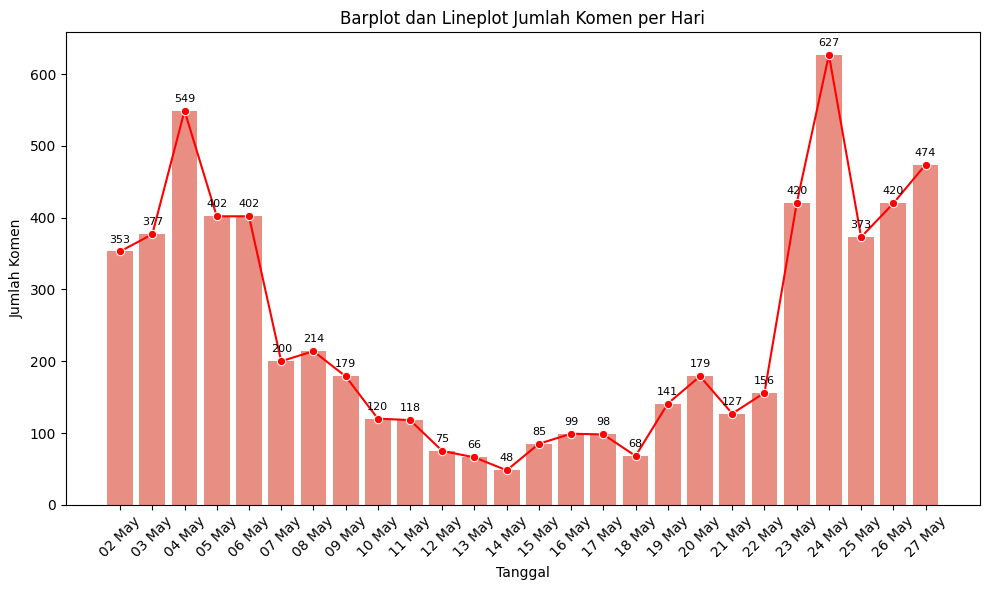

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with one axis
fig, ax = plt.subplots(figsize=(10, 6))

# Barplot
sns.barplot(x='tanggal', y='size', data=komen_per_hari, ax=ax, color='salmon')

# Lineplot on top of the barplot
sns.lineplot(x='tanggal', y='size', data=komen_per_hari, ax=ax, color='red', marker='o')

# Annotate the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Menghapus desimal dan mengubah ke integer
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',  # Posisikan tepat di atas bar
                fontsize=8, color='black',  # Ukuran font lebih kecil
                xytext=(0, 5), textcoords='offset points')  # Jarak sedikit di atas bar

# Add labels and title
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah Komen')
ax.set_title('Barplot dan Lineplot Jumlah Komen per Hari')

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.tight_layout()
plt.show()

Interpretasi:

- Isu Program Barak Militer bagi Siswa Bermasalah di Jawa Barat mulai ramai dibicarakan di media sosial pada awal Mei, terutama setelah pernyataan publik dari Dedi Mulyadi.

- Lonjakan komentar pertama terjadi pada 4 Mei (549 komen), diduga dipicu oleh pernyataan awal atau viralnya wacana program tersebut di media sosial.

- Lonjakan kedua muncul pada 23 Mei (627 komen), kemungkinan sebagai respons terhadap klarifikasi, kritik lanjutan, atau diskusi publik yang kembali mengemuka.

- Di antara dua puncak tersebut, terjadi penurunan drastis, mencerminkan redanya diskusi sementara sebelum kembali meningkat — menunjukkan bahwa isu ini memicu kontroversi dan reaksi berulang dari publik.

## Distribusi Sentimen per Tanggal

<ipython-input-34-f6ce7c31da7a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentimen_per_tanggal = data.groupby(['published_at', 'label']).size().reset_index(name='jumlah')


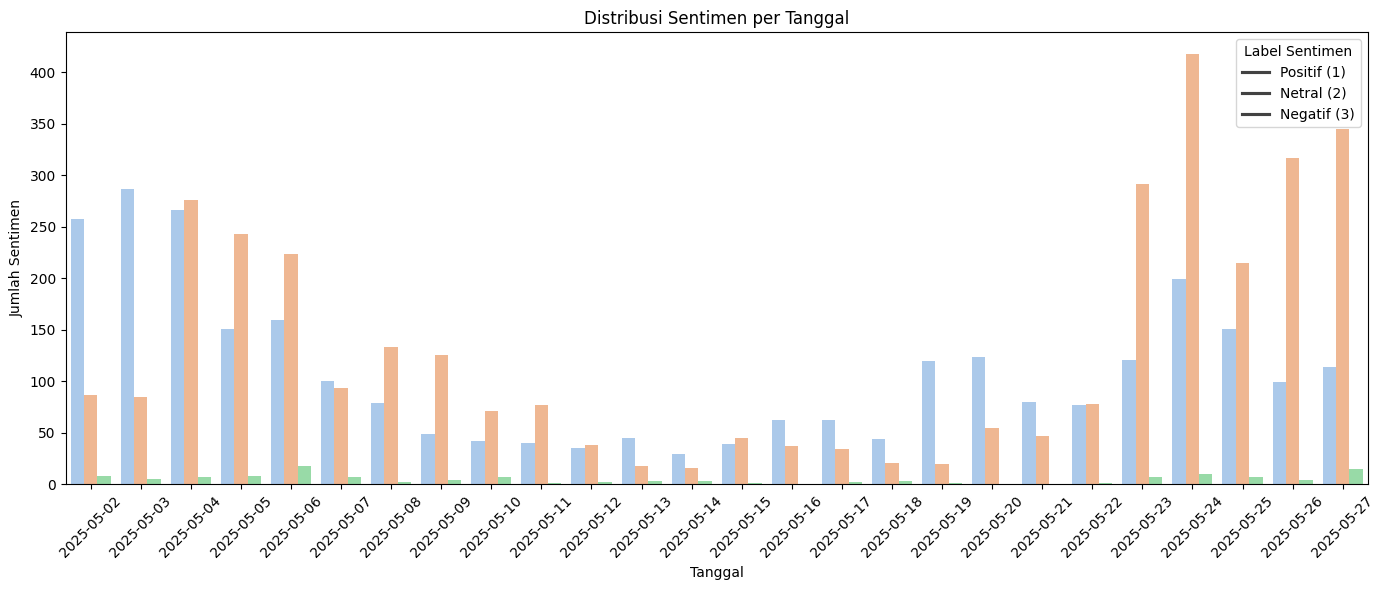

In [ ]:
# Pastikan kolom tanggal dalam format datetime dan hanya menyimpan Y-M-D
data['published_at'] = pd.to_datetime(data['published_at']).dt.date

# Kelompokkan berdasarkan tanggal dan label
sentimen_per_tanggal = data.groupby(['published_at', 'label']).size().reset_index(name='jumlah')

# Buat bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x='published_at', y='jumlah', hue='label', data=sentimen_per_tanggal, palette='pastel')

plt.title("Distribusi Sentimen per Tanggal")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Sentimen")
plt.xticks(rotation=45)
plt.legend(title='Label Sentimen', labels=['Positif (1)', 'Netral (2)', 'Negatif (3)'])
plt.tight_layout()
plt.show()


**Persepsi Netizen Pada 1 Bulan Pertama Pemberlakuan Program Barak Militer**

Pada minggu pertama, komentar bernada positif paling banyak ditemukan, meskipun tetap ada komentar negatif yang umumnya mengungkapkan kekhawatiran terhadap pendekatan militer yang dianggap terlalu keras dalam membentuk karakter siswa.

Memasuki minggu kedua, jumlah total komentar menurun dibandingkan minggu sebelumnya, kemungkinan karena program sedang berlangsung dan perhatian publik mulai menurun. Namun, komentar positif dan netral masih menjadi mayoritas.

Pada minggu ketiga dan keempat, jumlah komentar kembali meningkat signifikan, dengan puncaknya terjadi di minggu keempat. Pada periode ini, komentar netral menjadi yang paling dominan. Komentar-komentar tersebut umumnya berisi saran untuk perbaikan program, evaluasi, hingga kritik atau sindiran terhadap pihak pemerintah yang tidak mendukung program dan dianggap ingin menghentikannya.

Insight :
1. Netralitas dalam opini publik tidak selalu berarti pasif; justru bisa menjadi ekspresi aktif dari partisipasi kritis.

  Komentar netral yang dominan di minggu ketiga dan keempat ternyata bukan sekadar “diam” atau “tidak memihak”, melainkan berfungsi sebagai saluran kritik, saran, hingga satire terhadap pihak yang pro maupun kontra. Ini menunjukkan bahwa publik menggunakan ruang netral bukan karena tidak punya pendapat, tetapi sebagai media diskusi, kontrol sosial, dan refleksi kebijakan.

2. Isu sentimen negatif bersifat preventif, lebih berupa kewaspadaan terhadap pendekatan kebijakan, bukan perlawanan terhadap tujuannya. Ini memberi peluang bagi pemerintah untuk membangun narasi kebijakan yang lebih edukatif dan empatik.

  Komentar negatif di awal bukan sepenuhnya berisi penolakan, melainkan sebagian besar muncul dari kekhawatiran terhadap metode militerisasi dan dampaknya terhadap perkembangan karakter anak.



## Top 10 Video dengan Komentar Terbanyak (04 Mei 2025)

<ipython-input-35-5417122c39b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=video_counts, x='jumlah_komentar', y='video_title', palette='viridis')
<ipython-input-35-5417122c39b7>:20: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


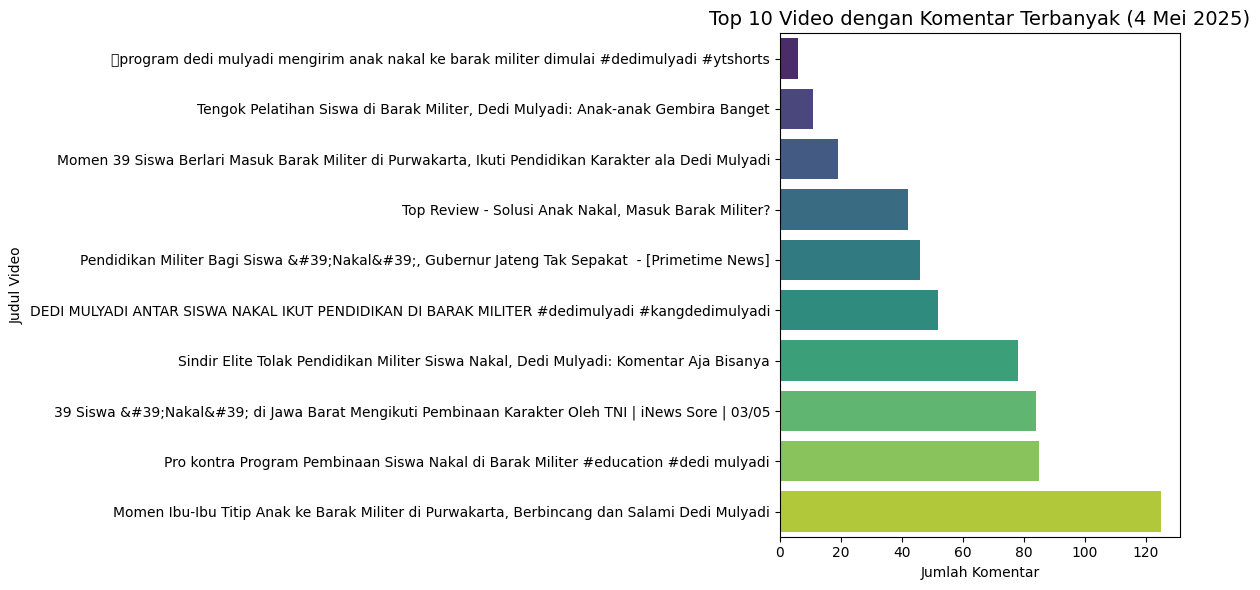

In [ ]:
# Filter data pada tanggal tertentu
top_dates2 = ['2025-05-04']
data_top2 = data[data['published_at'].isin(pd.to_datetime(top_dates2).date)]

# Hitung jumlah komentar per video title
video_counts = data_top2['video_title'].value_counts().reset_index()
video_counts.columns = ['video_title', 'jumlah_komentar']

# Ambil 10 teratas dan urutkan
top_n = 10
video_counts = video_counts.head(top_n).sort_values(by='jumlah_komentar', ascending=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=video_counts, x='jumlah_komentar', y='video_title', palette='viridis')

plt.title('Top 10 Video dengan Komentar Terbanyak (4 Mei 2025)', fontsize=14)
plt.xlabel('Jumlah Komentar')
plt.ylabel('Judul Video')
plt.tight_layout()
plt.show()


Interpretasi:

Lonjakan pertama terjadi pada tanggal 04 Mei 2025, dengan total 549. Lonjakan pertama terjadi tak lama setelah pemberlakuan Program Barak Militer Bagi Siswa Bermasalah, yang mana menimbulkan berbagai reaksi dari warganet.

Sebagian besar judul video yang tampil mengandung kata-kata kontreversi dan emosial, sepeti: "Anak Nakal", "Barak Militer", "Momen", "Dedi Mulyadi", "Sindir Elite", "Pro/kontra". Judul-judul ini berpicu "clickbait" sehingga membuat rasa penasaran masyarakat untuk memberi kritik, terutama yang melibatkan emosi. Judul-judul ini juga provokatif dan mengandung isu sosial yang juga cenderung meningkatkan warganet untuk berkomentar

## Top 10 Video dengan Komentar Terbanyak (24 Mei 2025)

<ipython-input-36-adb11a6c70f6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=video_counts, x='jumlah_komentar', y='video_title', palette='viridis')
<ipython-input-36-adb11a6c70f6>:24: UserWarning: Glyph 129401 (\N{FACE HOLDING BACK TEARS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129401 (\N{FACE HOLDING BACK TEARS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


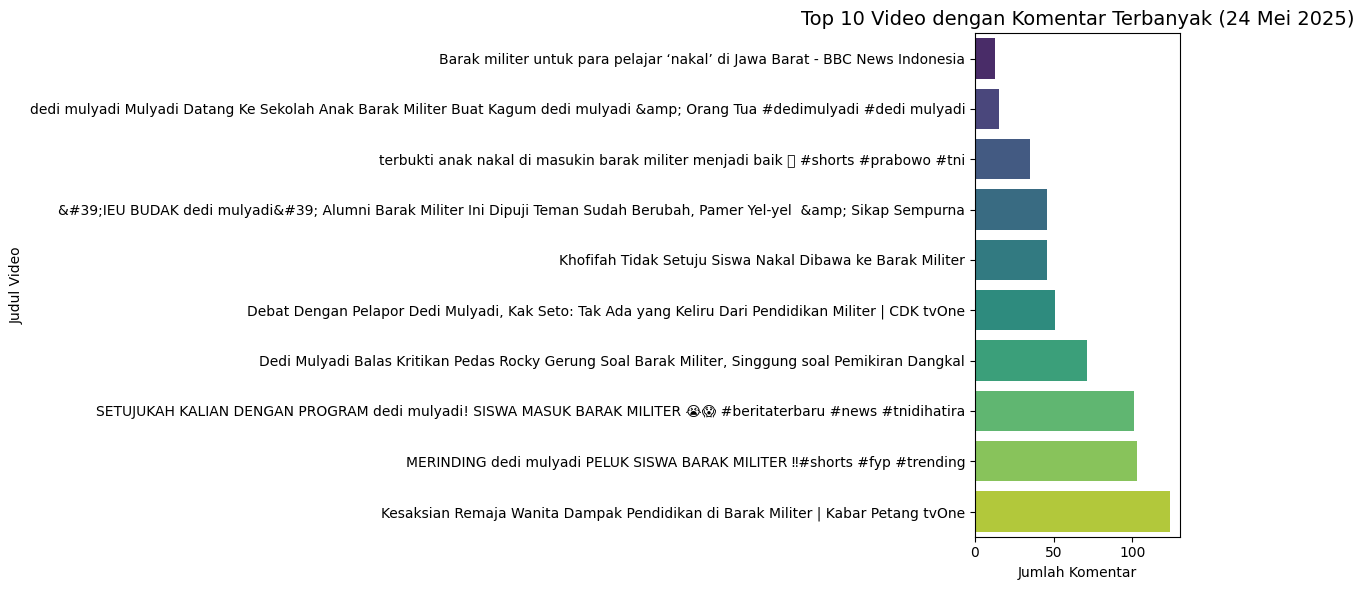

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data pada tanggal tertentu
top_dates2 = ['2025-05-24']
data_top2 = data[data['published_at'].isin(pd.to_datetime(top_dates2).date)]

# Hitung jumlah komentar per video title
video_counts = data_top2['video_title'].value_counts().reset_index()
video_counts.columns = ['video_title', 'jumlah_komentar']

# Ambil 10 teratas dan urutkan
top_n = 10
video_counts = video_counts.head(top_n).sort_values(by='jumlah_komentar', ascending=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=video_counts, x='jumlah_komentar', y='video_title', palette='viridis')

plt.title('Top 10 Video dengan Komentar Terbanyak (24 Mei 2025)', fontsize=14)
plt.xlabel('Jumlah Komentar')
plt.ylabel('Judul Video')
plt.tight_layout()
plt.show()


Intepretasi:

Setelah lonjakan awal pada 04 Mei 2025 (549 komentar), lonjakan kedua terjadi pada 24 Mei 2025, dengan total 627 komentar — bahkan lebih tinggi dari sebelumnya.

Lonjakan kemungkinan terjadi karena:
*   Klarifikasi atau pernyataan publik dari tokoh seperti Dedi Mulyadi, pejabat, atau tokoh pendidikan.
*   Konten balasan atau debat lanjutan yang mengangkat kembali isu pendidikan militer.
*   Media atau influencer yang kembali menyoroti topik ini, terkhusus di youtube.

Judul video dan narasi pun semakin provokatif. Beberapa judul video menggunakan narasi emosional, seperti: "MERINDING...", “SETUJUKAH KALIAN DENGAN PROGRAM…”, “Balas Kritikan Pedas…”, “Anak Nakal Jadi Baik…”. Ini menunjukkan tidak meradanya perdebatan warganet, tetapi semakin memanas. Pemilik konten menggunakan judul yang memancing engagement lebih tinggi (clickbait).







# Analisis Sentimen

## Pie chart sentimen

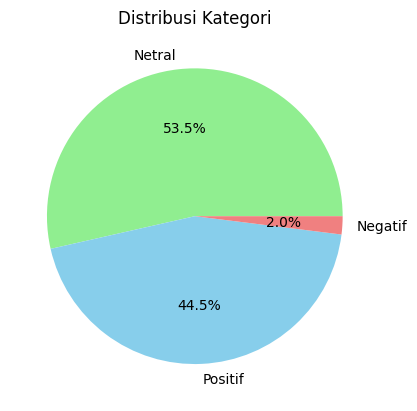

In [ ]:
# Menghitung distribusi kategori
category_counts = data['sentiment_label'].value_counts()

# Membuat pie chart
category_counts.plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'skyblue', 'lightcoral'])

# Menambahkan judul
plt.title('Distribusi Kategori')

# Menampilkan chart
plt.ylabel('')  # Menghilangkan label y agar lebih rapi
plt.show()

Interpretasi:

Netral (53.5%) :

- Mayoritas komentar bersifat informasi ulang atau netral secara emosi.

- Banyak publik menyampaikan kritik atau pertanyaan ke pemerintah, tanpa menyatakan setuju atau tidak.

- Netralitas juga muncul karena publik masih menunggu kejelasan aturan dan pelaksanaan program.

Positif (44.5%)

- Program dianggap sebagai solusi untuk membentuk kedisiplinan siswa bermasalah.

- Banyak yang mendukung upaya tegas dalam menangani geng motor remaja.

- Publik berharap barak militer dapat menanamkan nilai-nilai positif dan tanggung jawab.

Negatif (2.0%)

- Ada anggapan bahwa pendekatan militer bisa memicu perlawanan, bukan perbaikan.

- Kekhawatiran bahwa siswa bermasalah malah bisa menjadi lebih keras atau membangkang.

- Beberapa menganggap program ini hanya solusi jangka pendek yang tidak menyentuh akar masalah.



## Sentimen Positif

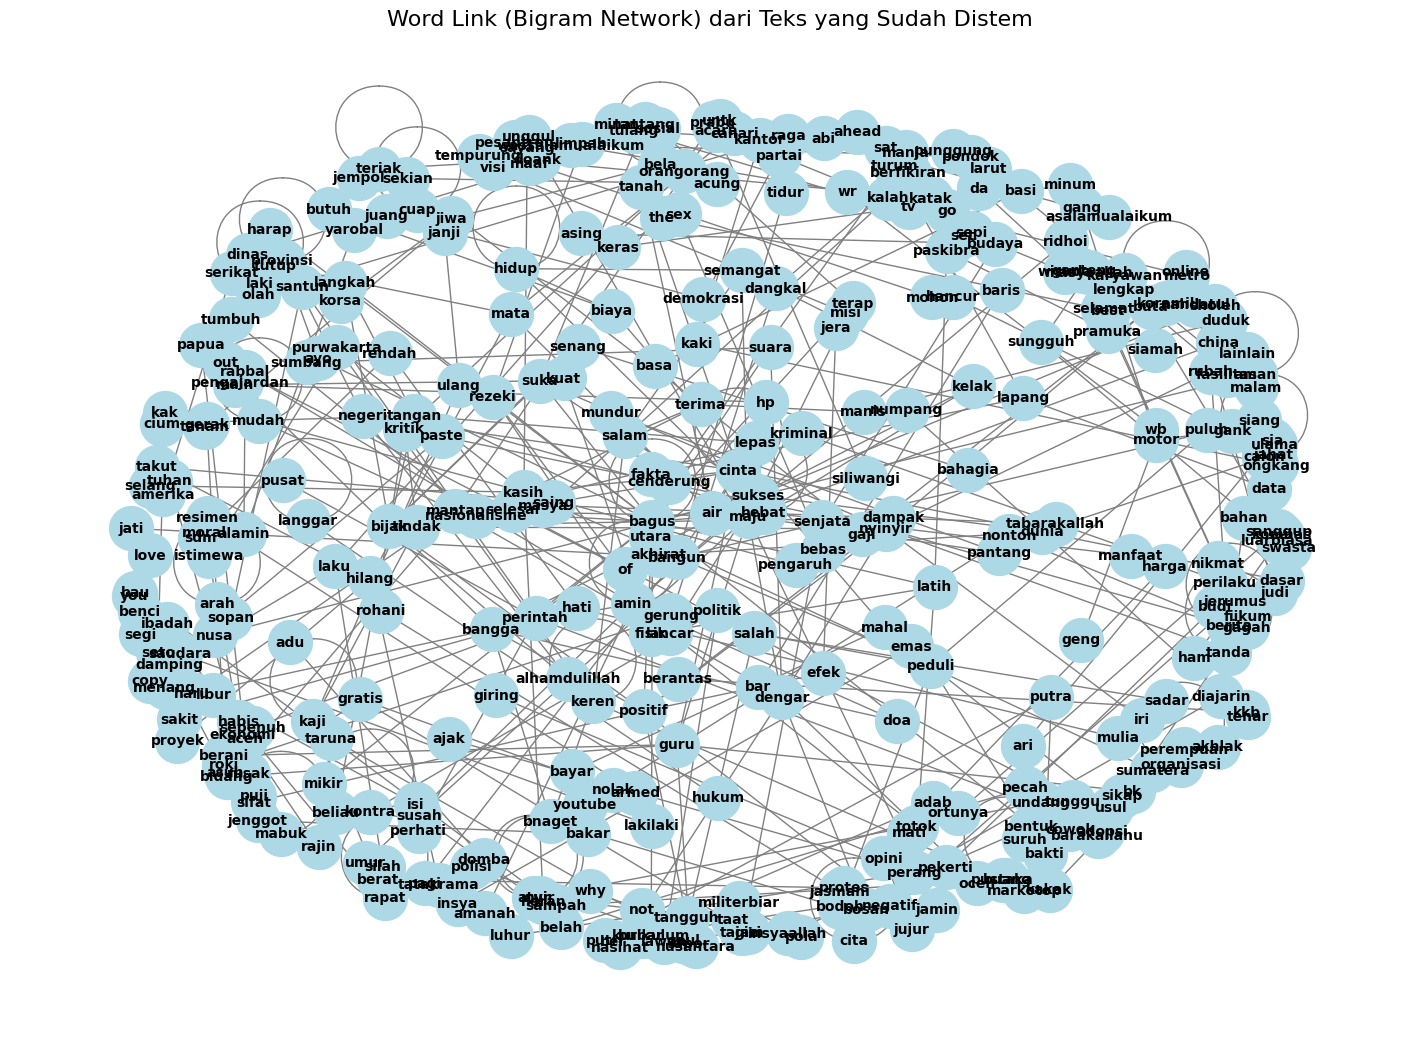

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# Pastikan df_stemmed memiliki kolom 'text'
# Ambil daftar teks (kalimat) dan ubah ke lowercase
texts = data[data['label'] == 1]['no_stopwords2'].astype(str).str.lower().tolist()

# Gunakan CountVectorizer untuk ekstraksi bigram
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=2)  # hanya bigram yang muncul minimal 2x
X = vectorizer.fit_transform(texts)
bigrams = vectorizer.get_feature_names_out()

# Pisahkan setiap bigram menjadi pasangan kata
edges = [tuple(b.split()) for b in bigrams]

# Buat Graph dari bigram
G = nx.Graph()
G.add_edges_from(edges)

# Visualisasi graf bigram
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)  # layout posisi node
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=1000,
    font_size=10,
    font_weight='bold'
)
plt.title("Word Link (Bigram Network) dari Teks yang Sudah Distem", fontsize=16)
plt.show()

 Network ini menunjukkan bahwa percakapan publik mengenai program barak militer bagi siswa bermasalah mencakup berbagai topik: dari pendidikan, kedisiplinan, hingga kekhawatiran terhadap pendekatan militer. Kata-kata yang saling terhubung menegaskan adanya dua kutub persepsi utama: dukungan karena alasan pembinaan, dan penolakan karena kekhawatiran dampak negatif bagi anak-anak.

In [ ]:
# Cek kata apa yang paling banyak punya edge (koneksi).
import networkx as nx

centrality = nx.degree_centrality(G)
sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('bagus', 0.051075268817204304),
 ('maju', 0.03494623655913979),
 ('amin', 0.03225806451612903),
 ('cinta', 0.02688172043010753),
 ('nyinyir', 0.02688172043010753),
 ('bijak', 0.024193548387096777),
 ('positif', 0.024193548387096777),
 ('mantap', 0.024193548387096777),
 ('hebat', 0.021505376344086023),
 ('bangga', 0.01881720430107527)]

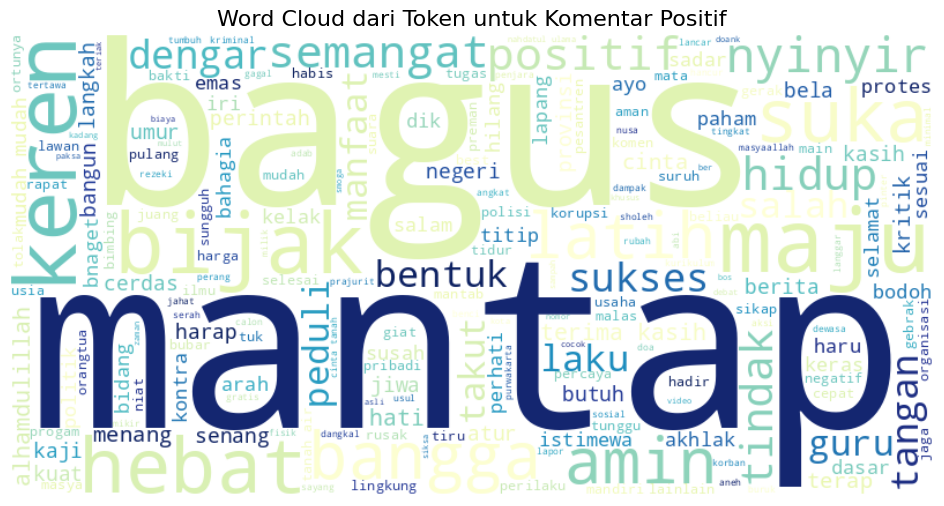

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter data ke label positif
positif_data = data[data['label'] == 1]

# Gabungkan semua token menjadi satu list
all_tokens = positif_data['tokenize_text'].sum()  # karena isinya list per baris

# Ubah list token menjadi string dipisahkan spasi
text_positif = " ".join(all_tokens)

# Buat Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='YlGnBu'
).generate(text_positif)

# Tampilkan
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud dari Token untuk Komentar Positif", fontsize=16)
plt.show()

Makna kata:
1. Kata-kata seperti bagus, maju, bijak, mantap, positif, dan hebat menunjukkan dukungan kuat dari sebagian netizen terhadap program pendidikan barak militer.
2. Bangga dan cinta menunjukkan adanya emosi  dan keterikatan terhadap program atau sosok tertentu (kemungkinan besar terhadap tokoh seperti Dedi Mulyadi).
3. Kata amin memperlihatkan bahwa komentar bersentimen positif sering kali dibumbui dengan doa atau harapan keberhasilan.

Word Link:
*   Node besar seperti “bangga”, “cinta”, “bijak”, dan “positif” memiliki banyak koneksi, artinya kata ini sering digunakan bersamaan dengan kata-kata bermakna dukungan.
*    kata nasionalisme, perintah, pengaruh, senjata, taruna, dan pramuka, menunjukkan danya dukungan terhadap nilai kedisiplinan dan bela negara.



## Sentimen Negatif

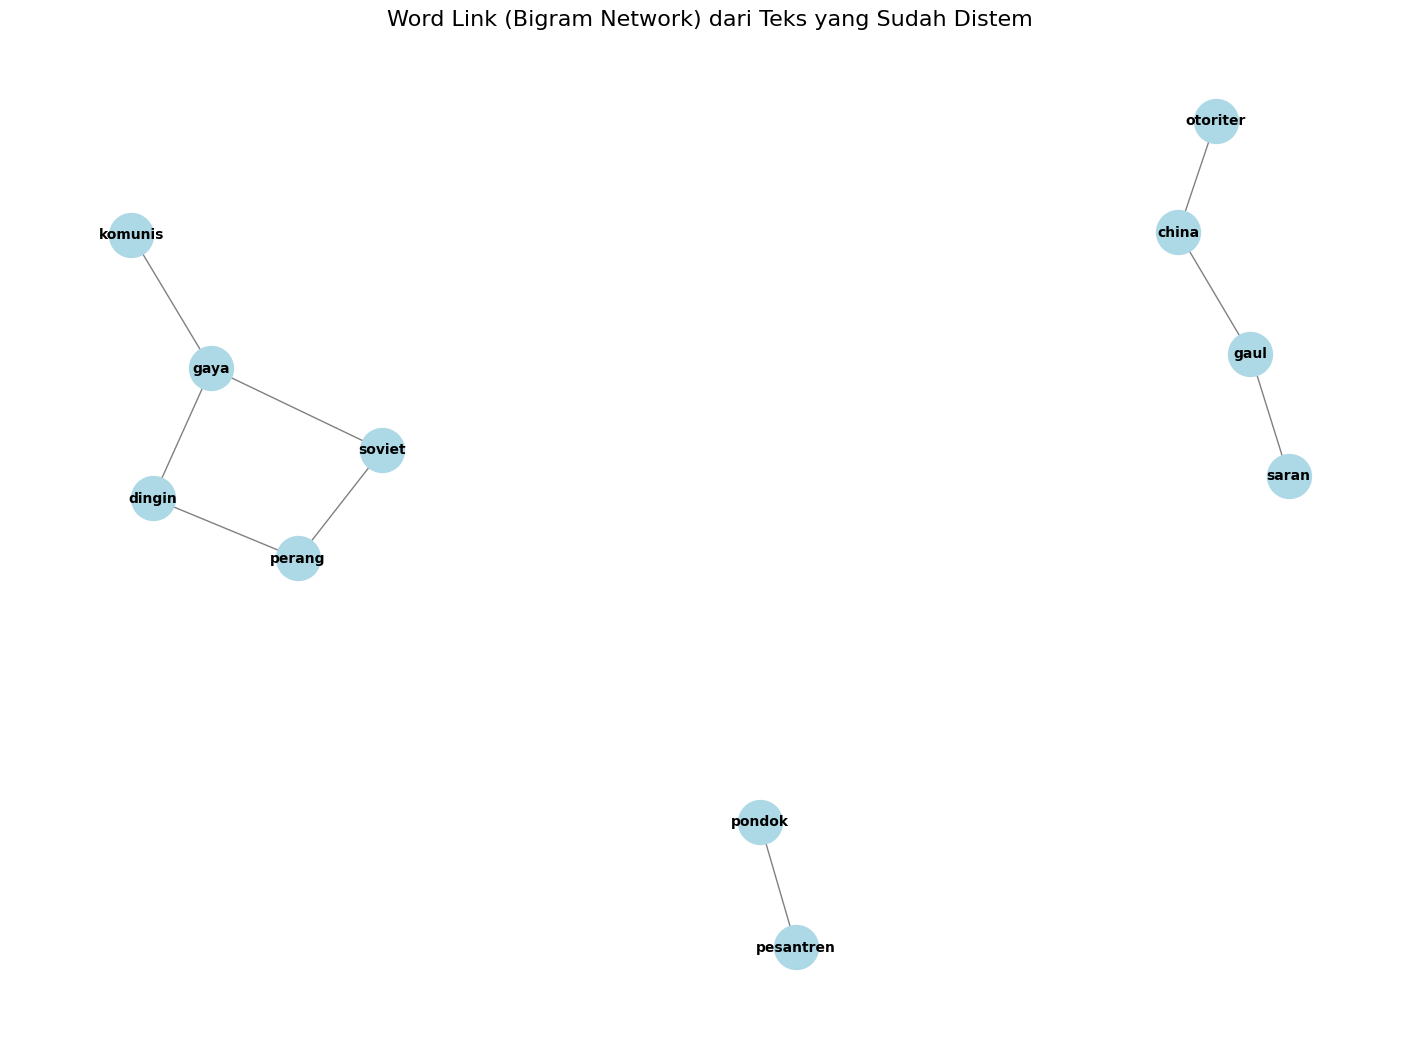

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# Pastikan df_stemmed memiliki kolom 'text'
# Ambil daftar teks (kalimat) dan ubah ke lowercase
texts = data[data['label'] == 3]['no_stopwords2'].astype(str).str.lower().tolist()

# Gunakan CountVectorizer untuk ekstraksi bigram
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=2)  # hanya bigram yang muncul minimal 2x
X = vectorizer.fit_transform(texts)
bigrams = vectorizer.get_feature_names_out()

# Pisahkan setiap bigram menjadi pasangan kata
edges = [tuple(b.split()) for b in bigrams]

# Buat Graph dari bigram
G = nx.Graph()
G.add_edges_from(edges)

# Visualisasi graf bigram
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)  # layout posisi node
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=1000,
    font_size=10,
    font_weight='bold'
)
plt.title("Word Link (Bigram Network) dari Teks yang Sudah Distem", fontsize=16)
plt.show()

Jaringan ini menunjukkan bahwa persepsi publik mengaitkan program militerisasi siswa dengan isu ideologi (komunisme, perang dingin), otoritarianisme (China), dan alternatif seperti pesantren. Ini mencerminkan keberagaman persepsi, dari kritik ideologis hingga tawaran solusi.

In [ ]:
# Cek kata apa yang paling banyak punya edge (koneksi).
import networkx as nx

centrality = nx.degree_centrality(G)
sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

[('gaya', 0.30000000000000004),
 ('china', 0.2),
 ('dingin', 0.2),
 ('gaul', 0.2),
 ('soviet', 0.2),
 ('perang', 0.2),
 ('otoriter', 0.1),
 ('komunis', 0.1),
 ('pondok', 0.1),
 ('pesantren', 0.1)]

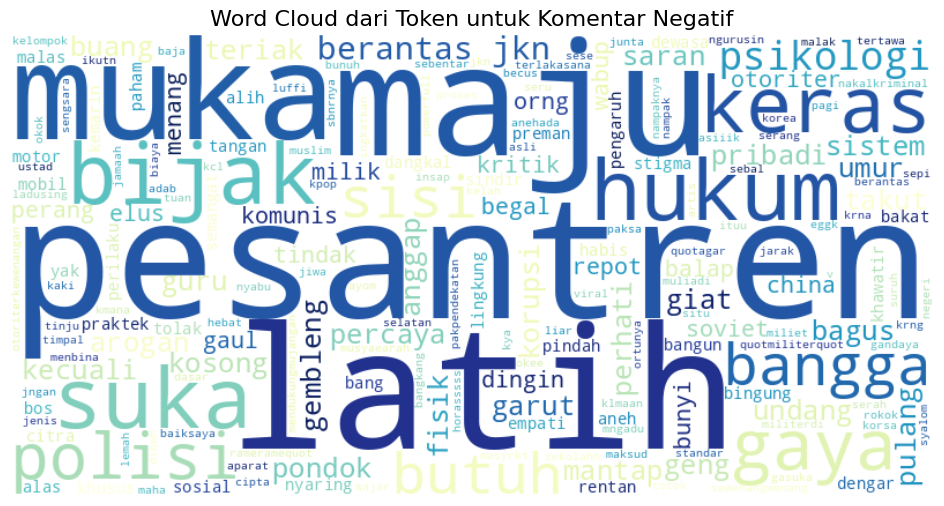

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter data ke label positif
positif_data = data[data['label'] == 3]

# Gabungkan semua token menjadi satu list
all_tokens = positif_data['tokenize_text'].sum()  # karena isinya list per baris

# Ubah list token menjadi string dipisahkan spasi
text_positif = " ".join(all_tokens)

# Buat Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='YlGnBu'
).generate(text_positif)

# Tampilkan
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud dari Token untuk Komentar Negatif", fontsize=16)
plt.show()

Makna Kata:
1. Kata “pesantren”, “pondok”, dan “psikologi” muncul paling banyak, menunjukkan adanya komentar negatif dengan membandingkannya dengan pendidikan pesantren dan psikologi.
2. Kata “gaya”, “keras”, “arogan”, “otoriter”, dan “komunis” menunjukkan persepsi bahwa program militer ini dianggap terlalu kasar, kolot, atau bahkan otoriter.
3. Kata “soviet”, “china”, dan “perang dingin” menunjukkan bahwa sebagian warganet menganggap program ini menyerupai sistem pendidikan otoriter dari negara-negara komunis atau zaman Perang Dingin.
4. Kata “butuh”, “stigma”, “kosong”, dan “dangkai” menunjukkan kritik bahwa program ini dibuat hanya solusi dangkal.

Word Link:
- Node "gaya" memiliki degree centrality tertinggi, menunukkan mungkin bahwa program militer terkesan gaya yang negatif (kuno atau kaku).
- Kata “china” dan “otoriter” terhubung langsung, menunjukkan bahwa program ini dianggap meniru sistem pendidikan negara otoriter.
- “Pondok – pesantren” muncul sebagai pasangan (bigram), menunjukkan banyak warganet membandingkan dengan pendidikan pesantren



## Sentimen Netral

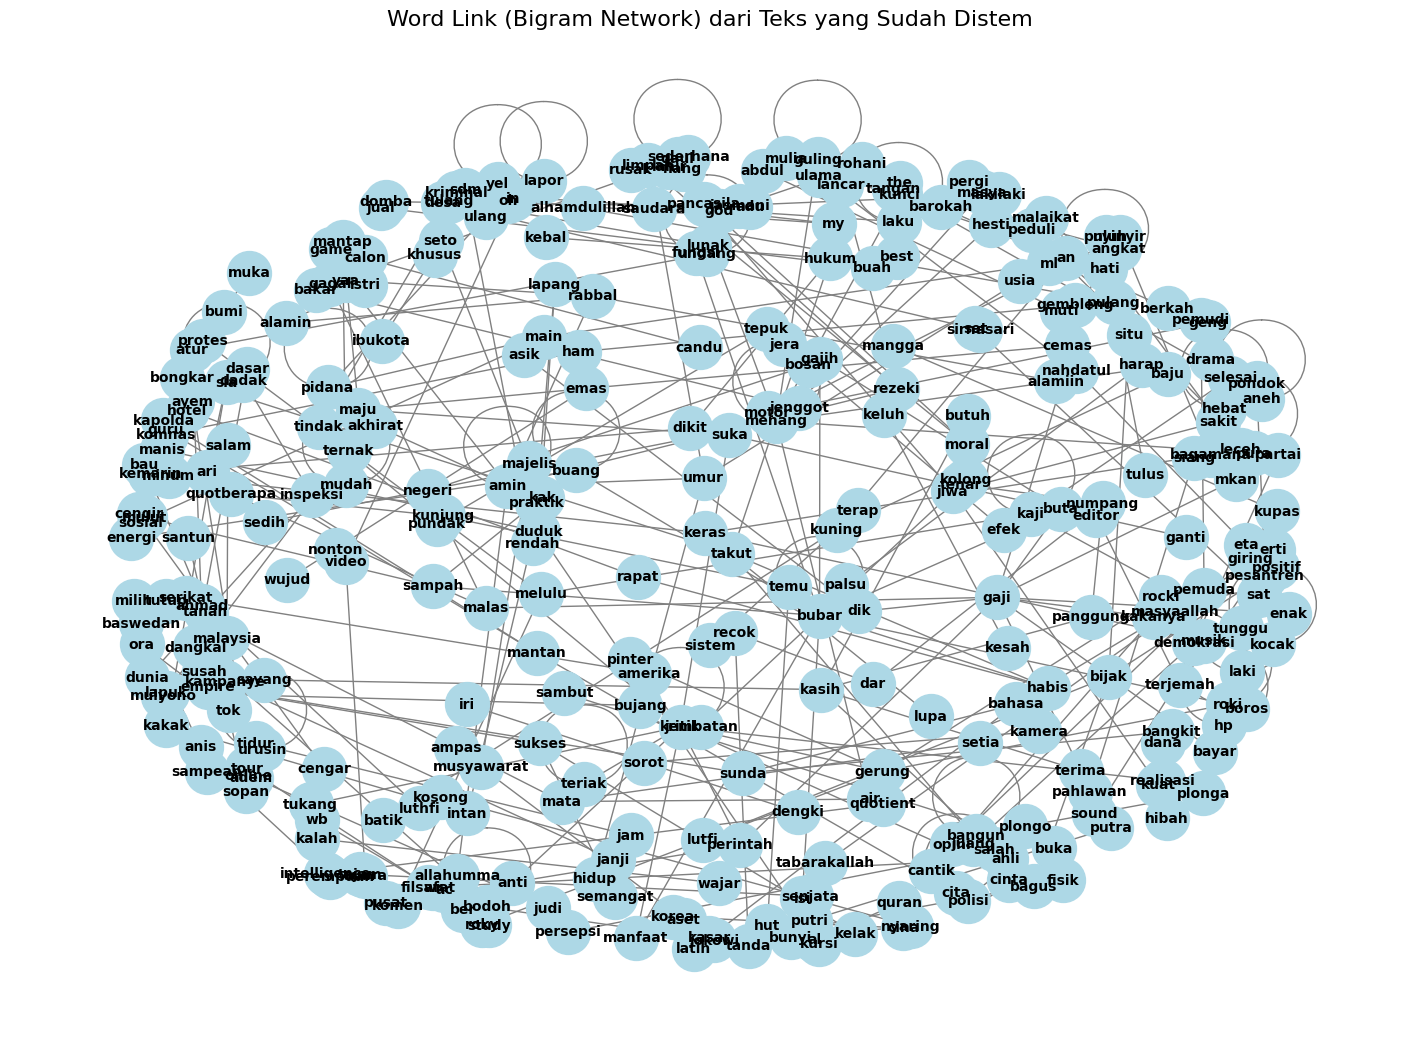

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# Pastikan df_stemmed memiliki kolom 'text'
# Ambil daftar teks (kalimat) dan ubah ke lowercase
texts = data[data['label'] == 2]['no_stopwords2'].astype(str).str.lower().tolist()

# Gunakan CountVectorizer untuk ekstraksi bigram
vectorizer = CountVectorizer(ngram_range=(2, 2), min_df=2)  # hanya bigram yang muncul minimal 2x
X = vectorizer.fit_transform(texts)
bigrams = vectorizer.get_feature_names_out()

# Pisahkan setiap bigram menjadi pasangan kata
edges = [tuple(b.split()) for b in bigrams]

# Buat Graph dari bigram
G = nx.Graph()
G.add_edges_from(edges)

# Visualisasi graf bigram
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)  # layout posisi node
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=1000,
    font_size=10,
    font_weight='bold'
)
plt.title("Word Link (Bigram Network) dari Teks yang Sudah Distem", fontsize=16)
plt.show()

- Narasi publik yang beragam dan padat, mencakup moral anak muda, peran agama, isu kebijakan, hingga media digital.

- Moralitas dan agama muncul sebagai nilai dominan dalam merespons isu yang dibahas.

- Ada juga nuansa kritik sosial dan politik, serta sorotan terhadap media dan ekspresi daring.

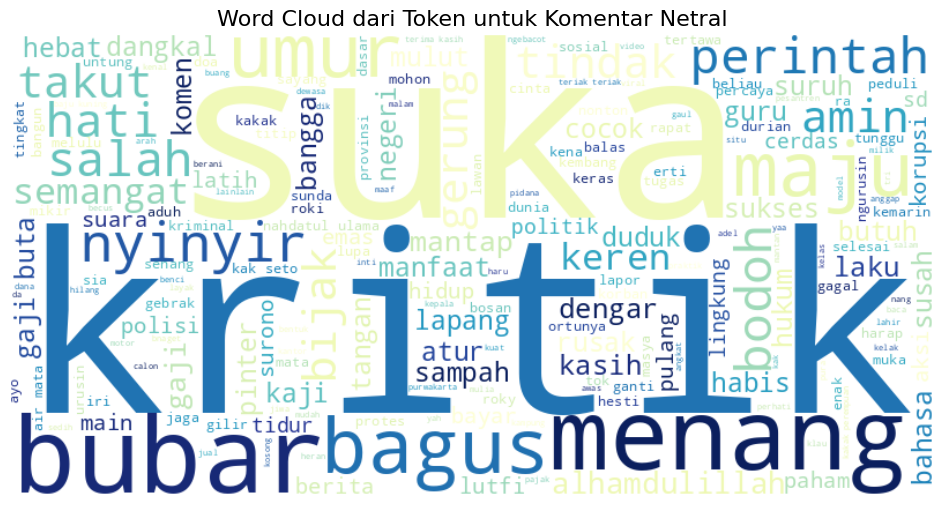

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter data ke label positif
positif_data = data[data['label'] == 2]

# Gabungkan semua token menjadi satu list
all_tokens = positif_data['tokenize_text'].sum()  # karena isinya list per baris

# Ubah list token menjadi string dipisahkan spasi
text_positif = " ".join(all_tokens)

# Buat Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='YlGnBu'
).generate(text_positif)

# Tampilkan
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud dari Token untuk Komentar Netral", fontsize=16)
plt.show()

Karena sentimen netral susah diintrepetasikan, karena dalam konteks topik ini (barak militer untuk siswa nakal), sentimen netral sulit untuk diinterpretasikan atau tidak terlalu bermakna secara analitis. Maka dilakukan analisis lanjutan untuk sentimen netral. (dibawah ini)

## Analisis Lebih Lanjut Sentimen Netral

In [ ]:
# Misal kolom sentimen bernama 'label'
netral_data = data[data['label'] == 2]
print(f"Total komentar netral: {len(netral_data)}")

Total komentar netral: 3411


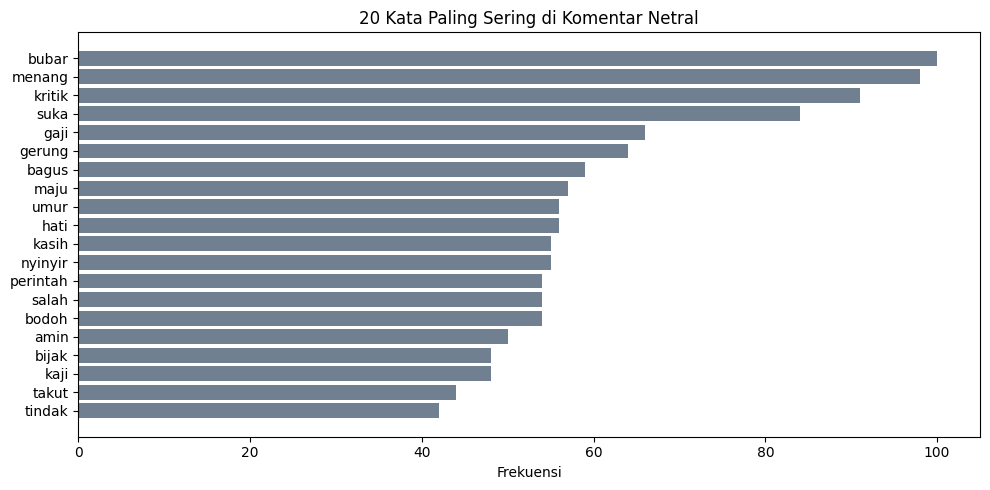

In [ ]:
from collections import Counter

# Gabungkan semua teks komentar netral
all_text = ' '.join(netral_data['no_stopwords2'])

# Pecah jadi kata
words = all_text.split()
word_freq = Counter(words).most_common(20)

# Visualisasi
import matplotlib.pyplot as plt
words, freqs = zip(*word_freq)
plt.figure(figsize=(10,5))
plt.barh(words[::-1], freqs[::-1], color='slategray')
plt.title('20 Kata Paling Sering di Komentar Netral')
plt.xlabel('Frekuensi')
plt.tight_layout()
plt.show()

-  Kata-kata seperti bubar, kritik, nyinyir, salah, bodoh, dan takut menunjukkan adanya kritik atau ketidaksetujuan yang disampaikan.
-  kata-kata seperti menang, suka, bagus, amin, bijak, dan kasih menunjukkan dukungan terhadap program ini.
- kata-kata gaji, gerung, perintah, tindak, umur, menunjukkan bahwa sebagian komentar netral membahas isu (misalnya aspek pendidikan, tokoh, atau kebijakan), bukan emosi pribadi.
- Sentimen netral menujukkan beragamnya komentar wargenet terhadap program ini, baik pro dan kontra, tanpa ekspresi emosional yang kuat.

In [ ]:
# Hitung total komentar per video
total_per_video = data['video_title'].value_counts().reset_index(name='total_komentar')
total_per_video.columns = ['video_title', 'total_komentar']

# Hitung komentar netral per video
netral_per_video = netral_data['video_title'].value_counts().reset_index(name='komentar_netral')
netral_per_video.columns = ['video_title', 'komentar_netral']

# Gabungkan berdasarkan video_title
summary = pd.merge(netral_per_video, total_per_video, on='video_title')

# Hitung rasio komentar netral
summary['rasio_netral'] = summary['komentar_netral'] / summary['total_komentar']

# Tampilkan top 10 video dengan rasio netral tertinggi
summary.sort_values('rasio_netral', ascending=False).head(10)

video_title  komentar_netral  \
42  Percontohan Disiplin: Dedi Mulyadi Kirim 30 Si...                1   
0   Khofifah Tidak Setuju Siswa Nakal Dibawa ke Ba...              226   
33  Akibat Bolos Sekolah Langsung Di Jemput Pak De...                7   
1   Dedi Mulyadi Balas Kritikan Pedas Rocky Gerung...              212   
29  Langkah Berbeda KPAID Cirebon Justru Dukung Ba...               19   
25  PENGAKUAN MENGEJUTKAN SISWA DI BARAK MILITER, ...               31   
31  Yenny Wahid Beri Saran Penyempurnaan Program A...               14   
9   KPAI Desak Dedi Mulyadi Hentikan Pengiriman Si...              165   
5   Reaksi Keluarga Ketika Siswa Anak Nakal Lulus ...              193   
3   DEDI MULYADI ANTAR SISWA NAKAL IKUT PENDIDIKAN...              196   

    total_komentar  rasio_netral  
42               1      1.000000  
0              248      0.911290  
33               8      0.875000  
1              245      0.865306  
29              22      0.863636  
25              36      0.861111  
31              17      0.823529  
9              202      0.816832  
5              237      0.814346  
3              241      0.813278

- Video berjudul “Khofifah Tidak Setuju Siswa Nakal Dibawa ke Barak Militer”, “Akibat Bolos Sekolah Langsung Di Jemput…”, "Akibat Bolos Sekolah Langsung Di Jemput Pak Dedi Mulyadi Masuk Barak Militer Di Roblox"  memiliki rasio netral > 85%, menunjukkan bahwa topik-topik yang menyangkut otoritas atau tokoh besar sering mengundang komentar berhati-hati (netral) dan diluar topik isu program ini.
- Video seperti “Dedi Mulyadi Balas Kritikan Rocky Gerung…” juga banyak memuat komentar netral, yang mungkin muncul dari penonton yang bingung atau tidak memihak dalam debat antar tokoh.

# Topik Modelling

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
from bertopic import BERTopic

## Sentimen Positif

In [ ]:
text_pos = data[data['label'] == 1]
texts = text_pos['no_stopwords2']
texts

0                                                   bagus
3                                      takut kesinihormat
4                                        gede bagus bijak
6                                 gratis latih fisik suka
7       mulyadiga cuap omongdiskusi telaah sinikaga ke...
                              ...                        
6358                              kak setoini pakar faham
6359                kak seto zen maju dengar nenek lampir
6361    hadir mesti manfaat buang buang juang undang h...
6365    mengalangin denerin kangdedi manusa sebagay te...
6367                              siksa menang sifat arah
Name: no_stopwords2, Length: 2833, dtype: object

In [ ]:
texts = texts.astype(str).tolist()

In [ ]:
# Install UMAP if not already installed
!pip install umap-learn
!pip install hdbscan # Install hdbscan library

# Import UMAP
from umap import UMAP
from hdbscan import HDBSCAN # Import HDBSCAN

In [ ]:
# Inisialisasi model UMAP dengan random_state
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=37)

# Inisialisasi model clustering HDBSCAN dengan random_state
hdbscan_model = HDBSCAN(min_cluster_size=10,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# Inisialisasi BERTopic dengan model yang sudah disetel random_state
topic_model = BERTopic(
    language="indonesian",
    calculate_probabilities=True,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
)

# Fit model
topics, probs = topic_model.fit_transform(texts)

# Tampilkan topik dominan
topic_model.get_topic_info()

2025-06-05 14:47:07,802 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/89 [00:00<?, ?it/s]

2025-06-05 14:48:22,312 - BERTopic - Embedding - Completed ✓
2025-06-05 14:48:22,314 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-05 14:48:48,420 - BERTopic - Dimensionality - Completed ✓
2025-06-05 14:48:48,422 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-05 14:48:49,187 - BERTopic - Cluster - Completed ✓
2025-06-05 14:48:49,194 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-05 14:48:49,296 - BERTopic - Representation - Completed ✓


Topic  Count                                        Name  \
0      -1    931                -1_mudah_keren_bijak_nyinyir   
1       0    195                                 0_please___   
2       1     91                1_mantap_kontra_rekrut_calon   
3       2     76                 2_masarakat_gagas_kbun_ente   
4       3     76                3_pindah_ulang_preman_gebrak   
..    ...    ...                                         ...   
59     58     11                     58_china_pik_segi_bukit   
60     59     11                  59_best_the_terud_greatest   
61     60     11                 60_tertawa_jago_belanda_egi   
62     61     11  61_assalamualaikum_asalamualaikum_malam_wb   
63     62     10              62_laku_otomatis_tindak_cermin   

                                       Representation  \
0   [mudah, keren, bijak, nyinyir, perintah, manta...   
1                          [please, , , , , , , , , ]   
2   [mantap, kontra, rekrut, calon, prokontra, ora...   
3   [masarakat, gagas, kbun, ente, aneh, auto, nak...   
4   [pindah, ulang, preman, gebrak, pulang, kak, s...   
..                                                ...   
59  [china, pik, segi, bukit, maju, panglima, koma...   
60  [best, the, terud, greatest, terbaikdedi, weu,...   
61  [tertawa, jago, belanda, egi, humor, mantapp, ...   
62  [assalamualaikum, asalamualaikum, malam, wb, w...   
63  [laku, otomatis, tindak, cermin, retorika, kar...   

                                  Representative_Docs  
0   [usaha positif bimbing teriak doank usaha gili...  
1                                              [, , ]  
2                            [mantap, mantap, mantap]  
3   [ass kmha ponakan abi murangkalih ampun tara k...  
4                        [pindah, pindah, pindah ayo]  
..                                                ...  
59  [penyiksaantapi salah tempa paham juang raih o...  
60     [merinding hebat the best, the best, the best]  
61  [tertawa tertawa tertawa nampak citra nyapres ...  
62  [assalamualaikum putri kedul kana sakolana pal...  
63             [laku, laku, cermin perilaku otomatis]  

[64 rows x 5 columns]

In [ ]:
topic_model.visualize_topics()

Topic modeling dilakukan pada komentar bersentimen positif dan menghasilkan lebih dari 60 topik. Namun, setelah dilakukan seleksi dan pengelompokan berdasarkan kesesuaian makna dan konteks, kami menyederhanakannya menjadi beberapa klaster utama saja.

**Klaster 1: Religiusitas dan Spiritual**
*   **Kata kunci:** *masyallah, subhanallah, tabarakallah, amin, amanah, rabbal, organisasi, produktif, berkat*
*   **Interpretasi:** Klaster ini mencerminkan ekspresi keagamaan dan juga spiritualitas. Adanya kata-kata *masyallah* dan *subhanallah* menunjukkan kekaguman dan pujian terhadap program ini. Kata *amanah* dan *berkat* menunjukkan harapan bahwa program ini akan membawa kebaikan dan nilai moral.

**Klaster 2: Nasionalisme dan Politik**
*   **Kata kunci:** *nasionalisme, politik, partai, demokrasi, protes, leadership, kritik, komen, komentator*
*   **Interpretasi:** Klaster ini menunjukkan bahwa program barak militer memicu diskusi tentang nilai-nilai kebangsaan dan politik. Kata-kata seperti *nasionalisme* dan *demokrasi* menandakan bahwa program ini dilihat sebagai bagian dari upaya memperkuat identitas nasional. Kata *kritik* dan *komentator* menunjukkan adanya diskusi dan evaluasi terhadap implementasi program.

**Klaster 3: Pendidikan dan Pelatihan Fisik**
*   **Kata kunci:** *latih, fisik, adrenalin, seleksi, boarding, guru, kurikulum, kelas, mahal, proses*
*   **Interpretasi:** Klaster ini fokus pada aspek bagaimana pendidikan dan pelatihan fisik pada program ini. Kata-kata seperti *latih* dan *fisik* menunjukkan bahwa program ini bisa dianggap sebagai sarana untuk membentuk kedisiplinan dan daya tahan fisik siswa. Kata *kurikulum* dan *kelas* juga menunjukkan adanya perbandinan dan perhatian terhadap bagaimana program pendidikan yang diterapkan.


**Klaster 4: Motivasi dan Keberlanjutan Program**
*   **Kata kunci:** *pindah, langkah, pantang, mundur, lanjutkan, jasmani, doa, rohani, iman, tulus*
*   **Interpretasi:** Klaster ini menujukkan semangat, motivasi, dan harapan keberlanjutan dari program ini. Kata-kata seperti *pantang* dan *mundur* menunjukkan dorongan untuk keberlanjutan program ini.

**Klaster 5: Ekspresi Positif dan Dukungan**
*   **Kata kunci:** mantap, mantul, keren, betul, maju, seru, bijak, semangat, cerdas, jiwa, hidup
*   **Interpretasi:** Klaster ini terdiri dari ekspresi positif dan dukungan terhadap program. Kata-kata seperti *mantap* dan *keren* menunjukkan antusiasme dan apresiasi dari masyarakat. Istilah *maju* dan *bijak* menandakan bahwa program ini dianggap sebagai langkah positif dalam membentuk karakter siswa.









## Sentimen Negatif

In [ ]:
text_pos2 = data[data['label'] == 3]
texts2 = text_pos2['no_stopwords2']
texts2

10                                      dasar aparat adab
23                                                       
34                                                       
46                               orng begal nyabu tertawa
51      militerdi pondok pesantren pribadi baiksaya mi...
                              ...                        
5635                                           drd kumpul
5725           kutip kak seto latih bela bearti brainwash
5854                                  bingung tulus citra
5909    pengaruh semangat semangat praktek lapang angk...
5986                             citra sogok maju pilpres
Name: no_stopwords2, Length: 126, dtype: object

In [ ]:
texts2 = texts2.astype(str).tolist()

In [ ]:
topic_model = BERTopic(language="indonesian", calculate_probabilities=True)  # gunakan bahasa Indonesia
topics, probs = topic_model.fit_transform(texts2)

topic_model.get_topic_info()

Topic  Count                            Name  \
0     -1     47     -1_latih_bangga_polisi_suka   
1      0     59  0_geng_garut_kecuali_pesantren   
2      1     20        1_berantas_jkn_gaya_maju   

                                      Representation  \
0  [latih, bangga, polisi, suka, bijak, hukum, pe...   
1  [geng, garut, kecuali, pesantren, motor, wabup...   
2  [berantas, jkn, gaya, maju, saran, korupsi, ke...   

                                 Representative_Docs  
0  [luffi dibwh umur tuan umur proses hukum repot...  
1  [hilang geng motor geng motor, menbina baja mi...  
2  [gaya soviet perang dingin gaya komunis saran ...

In [ ]:
topic_model.visualize_barchart(top_n_topics=3)

Sentimen negatif hanya menghasilkan dua topik utama, yang mencerminkan bahwa jumlah warganet YouTube yang tidak setuju dengan program ini tergolong sedikit.

**Topik 0**
*   **Kata-kata utama:** *pesantren, garut, kecuali, bangga, bunyi*
*   **Interpretasi:** Topik ini menunjukkan ketidaksetujuan, misalnya perbandingan program dengan nilai-nilai atau praktik di pesantren. Kata *kecuali* dan *bangga* bisa menunjukkan adanya sikap membandingkan atau mempertanyakan program. Komentar seperti ini cenderung menyampaikan kritik atau menyindir konteks budaya/agama yang dianggap tidak cocok.

**Topik 1**
*   **Kata-kata utama:** *berantas, jkn, keras, sisi, gaya*
*   **Interpretasi:** Topik ini menunjukkan  penolakan terhadap pelaksanaan program ini. Kata *berantas* dan *keras* menunjukkan kekritisan terhadap program ini yang dianggap terlalu ekstrem. *Sisi* dan *gaya* menyiratkan kritik terhadap citra atau cara penyampaian program yang dinilai kurang tepat dari sudut pandang tertentu.





## Sentimen Netral

In [ ]:
text_pos3 = data[data['label'] == 2]
texts3 = text_pos3['no_stopwords2']
texts3

1                                        mikirin mikirnya
2                                          bubar retorika
5       latih fisik dasar latih sosialisasi hadap benc...
8                                                    aksi
11                                kecam komentator kritik
                              ...                        
6363                                            perempuan
6364                  menang menang guling guling sanggup
6366          biarin disiplinlucu tuanyakalu menang ledek
6368     hesti ngapai nagisin prihatin peduli tenar hesti
6369                                   darah kumat dengar
Name: no_stopwords2, Length: 3411, dtype: object

In [ ]:
texts3 = texts3.astype(str).tolist()

In [ ]:
# Inisialisasi model UMAP dengan random_state
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=37)

# Inisialisasi model clustering HDBSCAN dengan random_state
hdbscan_model = HDBSCAN(min_cluster_size=10,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# Inisialisasi BERTopic dengan model yang sudah disetel random_state
topic_model3 = BERTopic(
    language="indonesian",
    calculate_probabilities=True,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
)

# Fit model
topics, probs = topic_model3.fit_transform(texts3)

# Tampilkan topik dominan
topic_model3.get_topic_info()

2025-06-05 14:49:13,784 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/107 [00:00<?, ?it/s]

2025-06-05 14:50:03,813 - BERTopic - Embedding - Completed ✓
2025-06-05 14:50:03,815 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-05 14:50:39,516 - BERTopic - Dimensionality - Completed ✓
2025-06-05 14:50:39,519 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-05 14:50:40,546 - BERTopic - Cluster - Completed ✓
2025-06-05 14:50:40,551 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-05 14:50:40,654 - BERTopic - Representation - Completed ✓


Topic  Count                                 Name  \
0      -1   1320           -1_maju_nyinyir_salah_mata   
1       0    192                          0_please___   
2       1    130           1_bodoh_sampah_mulut_sedih   
3       2    117   2_bagus_hebat_alhamdulillah_terima   
4       3     91           3_teriak_gonggong_kaji_ben   
..    ...    ...                                  ...   
61     60     11       60_toxic_obat_narkotika_online   
62     61     11            61_guru_sistem_metode_uji   
63     62     11  62_assalamualaikum_mohon_info_hadir   
64     63     10     63_sepakat_baikbacot_cela_bulian   
65     64     10        64_debat_diskusi_retorika_adu   

                                       Representation  \
0   [maju, nyinyir, salah, mata, suka, tangan, bij...   
1                          [please, , , , , , , , , ]   
2   [bodoh, sampah, mulut, sedih, jahat, buruk, gi...   
3   [bagus, hebat, alhamdulillah, terima, kasih, b...   
4   [teriak, gonggong, kaji, ben, kuhp, emosi, mna...   
..                                                ...   
61  [toxic, obat, narkotika, online, emis, judi, d...   
62  [guru, sistem, metode, uji, salah, sd, wktu, i...   
63  [assalamualaikum, mohon, info, hadir, salam, p...   
64  [sepakat, baikbacot, cela, bulian, bkompas, jo...   
65  [debat, diskusi, retorika, adu, debatdebat, bu...   

                                  Representative_Docs  
0   [cocok jual durian, teriak teriak kritik hina ...  
1                                        [, , please]  
2                  [bodoh bodoh, bodoh, mulut sampah]  
3                               [bagus, bagus, bagus]  
4   [kait teriak teriak teriak ajak kesel, peci tu...  
..                                                ...  
61  [konsumsi obat beli warung samar toko kosmetik...  
62  [salah sistem duduk sd santai merdeka internas...  
63  [assalamualaikum provinsi jemput mohon info mo...  
64  [rancu peluang curangnyanggak efektip gelintir...  
65  [tumben acara adu domba sebentar ngundang deba...  

[66 rows x 5 columns]

In [ ]:
topic_model3.visualize_topics()

Komentar dengan sentimen netral sangat beragam, baik yang pro dan kontra dan sering kali keluar dari konteks topik utama, sehingga cukup sulit untuk diinterpretasikan. Topic modeling terhadap komentar netral menghasilkan lebih dari 60 topik. Namun, setelah dilakukan proses seleksi dan pengelompokan berdasarkan makna dan konteks, kami menyederhanakannya menjadi beberapa klaster utama berikut:

**Klaster 1: Wilayah dan Identitas Lokal**
*   **Kata kunci:** *provinsi, kabupaten, kota, desa, bahasa, halus, nadhatul ulama, rocky*
*   **Interpretasi:** Klaster ini menunjukkan perhatian terhadap identitas lokal dan nilai-nilai budaya.

**Klaster 2: Ucapan Syukur**
*   **Kata kunci:** *alhamdulillah, rezeki, limpah, mulia, amin, kasih, cinta, sayang, sosok, semangat, hidup, akhirat, doa*
*   **Interpretasi:** Klaster ini menujukkan respons positif yang bersifat religius dan emosional. Komentar bernada doa, ucapan syukur, dan pujian terhadap tokoh atau program yang dianggap membawa kebaikan, baik secara spiritual maupun sosial.

**Klaster 3: Isu Politik dan Pendidikan**
*   **Kata kunci:** *politik, partai, demokrasi, juang, gerung, sarjana, akademisi, alumni*
*   **Interpretasi:** Klaster ini menunjukkan komentar yang menyinggung aspek politik dan pendidikan, seperti partisipasi politik, kritik terhadap sistem, atau diskusi seputar latar belakang akademik tokoh yang dibahas.


**Klaster 4: Relasi Keluarga dan Sosial**
*   **Kata kunci:** *emaknya, emak, orangtua, hadir, kakak, perempuan, istri, cewek, beliau*
*   **Interpretasi:** Klaster ini menampilkan komentar yang mengacu pada keluarga atau tokoh perempuan. Bisa bersifat netral, bercanda, atau menyindir, tergantung konteks kalimat. Kehadiran tokoh perempuan juga bisa menunjukkan stereotip sosial atau ekspresi identitas gender.



**Klaster 5: Nada Negatif atau Ketidakpuasan Terselubung**
*   **Kata kunci:** *bosan, minim, jarang, kosong, kapan (kapai), lupa, kalah, hilang, iri hati, odoh, sampah, mulut, sedih, jahat, toxic, obat, narkotika*
*   **Interpretasi:** Meski bersentimen netral, klaster ini menunjukkan komentar yang mengandung ketidakpuasan atau kritik pasif-agresif. Isinya sering kali bersifat sindiran, ekspresi kejenuhan, atau kekecewaan yang tersamar.









# **Insight yang Didapat**

Berdasarkan analisis percakapan warganet di media sosial, khususnya YouTube, ditemukan sejumlah pola dan temuan penting yang menggambarkan respons publik terhadap program barak militer bagi siswa bermasalah di Jawa Barat.

1. **Tingginya Minat Publik di Media Sosial.**
  
  Hal tersebut tercermin dari lonjakan komentar pada 4 Mei dan 24 Mei 2025, yang menandakan bahwa isu ini mendapat respons besar dan memicu diskusi aktif di kalangan warganet, terutama di platform YouTube.
2.**Proporsi Sentimen Mayoritas Netral dan Positif.**

  Sentimen positif didominasi oleh dukungan terhadap program ini, terutama dalam nilai kedispilinan, nasionalisme, dan harapan terhadap perubahan perilaku siswa. Sementara itu, sentimen netral cenderung bersifat acak atau menunjukkan ketidakjelasan sikap publik terhadap isu ini.

3. **Sentimen Negatif Sangat Rendah.**

  Sentimen negatif bersifat preventif, yang isinya lebih banyak berupa kewaspadaan terhadap pendekatan kebijakan, bukan perlawanan terhadap tujuannya. Ini memberi peluang bagi pemerintah untuk membangun narasi kebijakan yang lebih edukatif dan empatik.
4. **Judul-Judul Video Bersifat Provokatif dan Emosional.**

  Banyaknya judul clickbait seperti "Anak Nakal", "Setujukah kalian", "Sindir Elite" mendorong warganet untuk berkomentar. Judul-judul dengan nada emosional terbukti sangat menarik perhatian dan respons dari warganet.

5. **Tokoh Sangat Berpengaruh dalam Meningkatnya Perhatian Terhadap Isu Ini.**

  Program ini tidak lepas dari peran Dedi Mulyadi sebagai Gubernur Jawa Barat sekaligus pengusung utama program. Banyak komentar yang muncul tidak hanya menilai program itu sendiri, tetapi juga menyoroti sosok Dedi Mulyadi, baik dalam bentuk dukungan maupun kritik.

6. **Warganet Membandingkan Program Barak Militer dengan Pendidikan Karakter Lain.**

  Sejumlah warganet membandingkan program ini dengan pendidikan karakter lain berbasis pesantren, psikologi, dan model pendidikan di negara komunis. Hal ini mencerminkan harapan publik terhadap hadirnya pendekatan pendidikan karakter yang lebih efektif dan sesuai

# **Rekomendasi**

Berdasarkan temuan dan analisis percakapan warganet, rekomendasi berikut ditujukan kepada pemerintah daerah dan pihak terkait agar program barak militer ini dapat berjalan dengan lebih efektif, adil, dan mendapat dukungan publik yang luas.

1. **Perlu Evaluasi Multidisipliner terhadap Program**

  Perlunya evaluasi yang melibatkan psikolog, pendidik, dan pakar hak anak untuk merancang pendekatan yang lebih dekat dengan sosial.

2. **Transparansi dan Sosialisasi Program**

  Harus adanya transparansi dan sosialisasi program. Narasi resmi dan penjelasan detail perlu disampaikan secara terbuka, terutama lewat platform yang ramai diskusi seperti YouTube dan Instagram.

3. **Narasi Positif tanpa Provokasi Emosional**

  Kurangi penggunaan istilah atau visual yang mengesankan hukuman atau kekarasan dalam publikasi. Fokus pada narasi pembinaan, karakter, dan kesempatan kedua.

4. **Pertimbangkan Alternatif Non-Militeristik**

  Pertimbangkan alternarif dari program ini (non militeristik), banyak komentar apresiasi terhadap pesantren dan pendekatan psikologis. Ini dapat diitegrasikan sebagai opsi alternatif.


5. **Lakukan Monitoring dan Feedback Berkala**

  Dilakukan monitoring dan feedback berkala untuk menunjukkan akuntabilitas dan keterbukaan pemerintah terhadap program ini.

# **Kesimpulan**

Banyak warganet mendukung program barak militer bagi siswa bermasalah di Jawa Barat sebagai upaya membentuk karakter dan kedisiplinan. Sedangkan, hanya sedikit warganet yang menentang program ini, menurut mereka pendekatan disiplin ala militer yang dinilai sebagian pihak terlalu keras dan berisiko melanggar hak anak. Pola percakapan warganet di YouTube menunjukkan tingginya atensi publik, dengan komentar yang mencerminkan keresahan, dukungan, dan refleksi terhadap peran orang tua serta sekolah. Sosok Dedi Mulyadi sebagai penggagas program dipandang cukup positif, dianggap tegas, berani, dan peduli terhadap masalah sosial, meskipun tidak lepas dari kontroversi.